In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from pandas.api.types import is_string_dtype
from sklearn.feature_selection import RFE
from statistics import mode
from statistics import mean

In [3]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None) 

In [4]:
df = pd.read_csv('loan.csv')
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

In [95]:
df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [6]:
paid = ["Does not meet the credit policy. Status:Fully Paid", "Fully Paid"]

# good_loan -1 bad_loan - 0
not_paid = ['Does not meet the credit policy. Status:Charged Off', 'Charged Off','Default']

df['loan_condition'] = np.nan

def loan_type(status):
    if status in not_paid:
        return 1
    elif status in paid:
        return 0

df['current_loan_status']=df['loan_status'].apply(loan_type)

In [7]:
df.groupby(by=['current_loan_status']).count()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_condition
current_loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,1043940,1043940,1043940,1043940,1043940,1043940,1043940,1043940,982945,988861,1043940,1043936,1043940,1043940,1043940,1043940,0,106143,1043940,1033241,1043939,1043940,1043690,1043914,1043914,1043913,512576,171668,1043914,1043914,1043940,1043264,1043914,1043940,1043940,1043940,1043940,1043940,1043940,1043940,1043940,1043940,1043940,1043940,1043940,1988,1043893,1043823,266868,1043940,1043940,17508,17506,17381,1043914,984743,984743,385762,385763,385763,385763,376311,385763,333129,385763,385763,385763,385720,984743,385763,385762,385762,1001557,984728,991051,990467,1043823,1043914,955939,984743,984743,984743,1001557,991752,243904,897738,345159,984743,984743,984743,994375,984743,984743,984743,984742,984743,994375,949824,984743,984743,984743,984611,990719,1042909,1043846,984743,1001557,1001557,984743,12458,12459,12459,12459,12459,12295,12459,12459,12459,12459,4155,1043940,1518,1518,1518,1518,1518,1518,1518,1518,1518,1518,1518,1429,1518,1518,1043940,1043940,4,4,4,4,4,4,0
1.0,0,0,262447,262447,262447,262447,262447,262447,262447,262447,240701,242035,262447,262447,262447,262447,262447,262447,0,19605,262447,257717,262447,262447,262385,262444,262444,262444,134779,50965,262444,262444,262447,262273,262444,262447,262447,262447,262447,262447,262447,262447,262447,262447,262447,260174,262447,792,262438,262419,75511,262447,262447,5736,5736,5717,262444,251368,251368,113813,113813,113813,113813,110268,113813,99566,113813,113813,113813,113805,251368,113813,113813,113813,254800,251362,251947,251784,262419,

In [8]:
df2 = df[df['current_loan_status'].isin([0,1])]
df2.count()

id                                                  0
member_id                                           0
loan_amnt                                     1306387
funded_amnt                                   1306387
funded_amnt_inv                               1306387
term                                          1306387
int_rate                                      1306387
installment                                   1306387
grade                                         1306387
sub_grade                                     1306387
emp_title                                     1223646
emp_length                                    1230896
home_ownership                                1306387
annual_inc                                    1306383
verification_status                           1306387
issue_d                                       1306387
loan_status                                   1306387
pymnt_plan                                    1306387
url                         

current_loan_status
0.0    1043940
1.0     262447
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Current Loan Status')

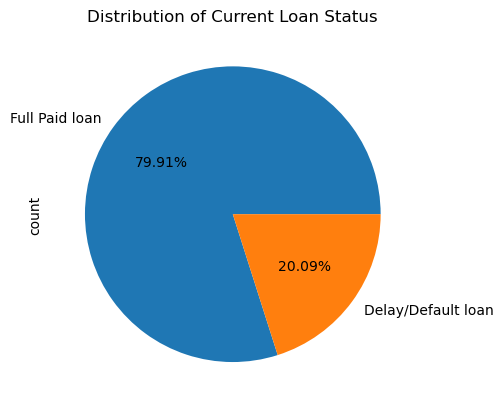

In [9]:
print(df['current_loan_status'].value_counts())
df['current_loan_status'].value_counts().plot(kind='pie',autopct='%1.2f%%', labels=['Full Paid loan','Delay/Default loan'])
plt.title('Distribution of Current Loan Status')

In [10]:
#Undersample the data
# Calculate 20% of the total rows
sample_size = int(0.2 * len(df2))

# Desired proportions
prop_1 = 0.7991
prop_0 = 0.2009

# Calculate the number of samples needed for each loan_status
sample_size_1 = int(sample_size * prop_1)
sample_size_0 = int(sample_size * prop_0)

# Separate the dataset by loan_status
df_1 = df2[df2['current_loan_status'] == 1]
df_0 = df2[df2['current_loan_status'] == 0]

# Perform undersampling
undersampled_df_1 = df_1.sample(n=sample_size_1, random_state=42)
undersampled_df_0 = df_0.sample(n=sample_size_0, random_state=42)

# Combine the undersampled dataframes
undersampled_df = pd.concat([undersampled_df_1, undersampled_df_0])

# Shuffle the undersampled dataset to mix the rows
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the undersampled dataset to a new CSV file
undersampled_df.to_csv('final_undersampled_df_change.csv', index=False)

print(f'Original dataset size: {len(df)}')
print(f'Undersampled dataset size: {len(undersampled_df)}')
print(f'Number of loan_status 1: {undersampled_df["current_loan_status"].value_counts()[1]}')
print(f'Number of loan_status 0: {undersampled_df["current_loan_status"].value_counts()[0]}')

Original dataset size: 2260668
Undersampled dataset size: 261276
Number of loan_status 1: 208786
Number of loan_status 0: 52490


In [11]:
undersampled_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_condition,current_loan_status
0,NaN,NaN,3025,3025,3025.0,36 months,7.97,94.76,A,A5,Support Specialist IT,6 years,RENT,38000.0,Source Verified,Jul-2017,Charged Off,n,NaN,NaN,small_business,Business,310xx,GA,19.24,1.0,Oct-2000,0.0,21.0,NaN,8.0,0.0,1291,56.10,32.0,f,0.0,0.0,1134.440000,1134.44,929.19,205.25,0.00,0.00,0.0,Aug-2018,94.76,NaN,Feb-2019,0.0,21.0,1,Individual,NaN,NaN,NaN,0.0,0.0,107553.0,0.0,4.0,1.0,2.0,12.0,106262.0,70.0,0.0,2.0,807.0,69.0,2300.0,5.0,1.0,6.0,4.0,13444.0,9.0,99.3,0.0,0.0,201.0,196.0,16.0,12.0,0.0,16.0,NaN,7.0,NaN,1.0,2.0,2.0,2.0,2.0,26.0,4.0,6.0,2.0,8.0,0.0,0.0,1.0,1.0,96.7,100.0,0.0,0.0,100396.0,107553.0,1300.0,98096.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,20000,20000,20000.0,60 months,22.70,560.37,E,E5,Hemet Valley Medical Center,5 years,RENT,110000.0,Source Verified,Jul-2013,Charged Off,n,NaN,NaN,debt_consolidation,Consolidation,925xx,CA,23.57,0.0,Apr-2009,1.0,NaN,NaN,11.0,0.0,4366,42.80,15.0,w,0.0,0.0,19022.400000,19022.40,4375.61,6831.79,0.00,7815.00,1406.7,Mar-2015,560.37,NaN,Aug-2018,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,93867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,8.0,8533.0,1852.0,47.1,0.0,0.0,49.0,51.0,15.0,8.0,0.0,25.0,NaN,1.0,NaN,0.0,2.0,5.0,2.0,2.0,9.0,6.0,6.0,5.0,11.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,115639.0,93867.0,3500.0,105439.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,Y,Dec-2015,COMPLETE,Aug-2015,7815.0,45.0,0.0,NaN,1.0
2,NaN,NaN,21100,21100,20900.0,36 months,18.55,768.65,E,E2,Principle,5 years,RENT,48000.0,Verif

In [12]:
undersampled_df.current_loan_status.value_counts()

current_loan_status
1.0    208786
0.0     52490
Name: count, dtype: int64

In [13]:
undersampled_df.shape

(261276, 147)

In [14]:
undersampled_df.isnull().sum()

id                                            261276
member_id                                     261276
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      20350
emp_length                                     19018
home_ownership                                     0
annual_inc                                         1
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [15]:
max_missing = undersampled_df.columns[(round(undersampled_df.isnull().sum()/len(undersampled_df.index), 2)*100)>70]
max_missing

Index(['id', 'member_id', 'url', 'desc', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'mths_since_recent_bc_dlq',
       'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',


In [16]:
undersampled_df.drop(columns=max_missing,axis=1,inplace=True)

In [17]:
undersampled_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status
0,3025,3025,3025.0,36 months,7.97,94.76,A,A5,Support Specialist IT,6 years,RENT,38000.0,Source Verified,Jul-2017,Charged Off,n,small_business,Business,310xx,GA,19.24,1.0,Oct-2000,0.0,21.0,8.0,0.0,1291,56.10,32.0,f,0.0,0.0,1134.440000,1134.44,929.19,205.25,0.00,0.00,0.0,Aug-2018,94.76,Feb-2019,0.0,1,Individual,0.0,0.0,107553.0,0.0,4.0,1.0,2.0,12.0,106262.0,70.0,0.0,2.0,807.0,69.0,2300.0,5.0,1.0,6.0,4.0,13444.0,9.0,99.3,0.0,0.0,201.0,196.0,16.0,12.0,0.0,16.0,7.0,NaN,1.0,2.0,2.0,2.0,2.0,26.0,4.0,6.0,2.0,8.0,0.0,0.0,1.0,1.0,96.7,100.0,0.0,0.0,100396.0,107553.0,1300.0,98096.0,N,Cash,N,1.0
1,20000,20000,20000.0,60 months,22.70,560.37,E,E5,Hemet Valley Medical Center,5 years,RENT,110000.0,Source Verified,Jul-2013,Charged Off,n,debt_consolidation,Consolidation,925xx,CA,23.57,0.0,Apr-2009,1.0,NaN,11.0,0.0,4366,42.80,15.0,w,0.0,0.0,19022.400000,19022.40,4375.61,6831.79,0.00,7815.00,1406.7,Mar-2015,560.37,Aug-2018,0.0,1,Individual,0.0,0.0,93867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,8.0,8533.0,1852.0,47.1,0.0,0.0,49.0,51.0,15.0,8.0,0.0,25.0,1.0,NaN,0.0,2.0,5.0,2.0,2.0,9.0,6.0,6.0,5.0,11.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,115639.0,93867.0,3500.0,105439.0,N,Cash,Y,1.0
2,21100,21100,20900.0,36 months,18.55,768.65,E,E2,Principle,5 years,RENT,48000.0,Verified,Sep-2015,Charged Off,n,debt_consolidation,Debt consolidation,750xx,TX,26.86,0.0,Aug-2000,0.0,24.0,15.0,0.0,11901,46.70,47.0,f,0.0,0.0,27025.290000,26769.13,20343.07,6643.79,38.43,0.00,0.0,Sep-2018,807.08,Feb-2019,1.0,1,Individual,0.0,166.0,70914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25500.0,NaN,NaN,NaN,8.0,4728.0,2512.0,82.6,0.0,0.0,180.0,120.0,11.0,3.0,0.0,11.0,4.0,24.0,0.0,4.0,5.0,4.0,4.0,36.0,11.0,11.0,5.0,15.0,0.0,0.0,0.0,2.0,95.2,50.0,0.0,0.0,98743.0,70914.0,14400.0,73243.0,N,Cash,N,1.0
3,25000,20850,19600.0,60 months,15.58,502.40,D,D3,Jacobs Technology,10+ years,MORTGAGE,68000.0,Source Verified,Sep-2010,Charged Off,n,small_business,Sadie,935xx,CA,0.60,0.0,Oct-1993,4.0,NaN,2.0,0.0,0,1.88,29.0,f,0.0,0.0,5526.400000,5194.63,2716.14,2800.91,0.00,9.35,0.0,Aug-2011,502.40,Feb-2019,0.0,1,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,Cash,N,1.0
4,6500,6500,6500.0,36 months,6.92,200.47,A,A4,Verifier,3 years,RENT,42000.0,Source Verified,May-2015,Fully Paid,n,credit_card,Credit card refinancing,386xx,MS,9.11,0.0,Dec

In [18]:
# loan amount, funded av , funded -- loan_amnt(pick 1) -- done
# fix date - calculate the number of the months till loan is issue - issue_d 
# drop loan_status column, zip_code, addr_state, total_pymnt, total_pymnt_inv, total_rec_prncp, last_pymnt_d, last_credit_pull_d,  - done
# feature - group in the states time zones - done
# region - new column - 6 time zones - state divide - done
# fix date - calculate the number of the months till loan is issue - earliest_cr_line
# imputing the null values delinq_2yrs of 0 value,
# categorical variables (2-3) more than 500 classes (drop )
# null values 

In [19]:
undersampled_df.drop(columns = ["funded_amnt", "funded_amnt_inv"], axis=1,inplace=True)

In [20]:
undersampled_df.drop(columns = ["zip_code", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "last_pymnt_d", "last_credit_pull_d"], axis=1,inplace=True)

In [21]:
undersampled_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status
0,3025,36 months,7.97,94.76,A,A5,Support Specialist IT,6 years,RENT,38000.0,Source Verified,Jul-2017,Charged Off,n,small_business,Business,GA,19.24,1.0,Oct-2000,0.0,21.0,8.0,0.0,1291,56.10,32.0,f,0.0,0.0,205.25,0.00,0.00,0.0,94.76,0.0,1,Individual,0.0,0.0,107553.0,0.0,4.0,1.0,2.0,12.0,106262.0,70.0,0.0,2.0,807.0,69.0,2300.0,5.0,1.0,6.0,4.0,13444.0,9.0,99.3,0.0,0.0,201.0,196.0,16.0,12.0,0.0,16.0,7.0,NaN,1.0,2.0,2.0,2.0,2.0,26.0,4.0,6.0,2.0,8.0,0.0,0.0,1.0,1.0,96.7,100.0,0.0,0.0,100396.0,107553.0,1300.0,98096.0,N,Cash,N,1.0
1,20000,60 months,22.70,560.37,E,E5,Hemet Valley Medical Center,5 years,RENT,110000.0,Source Verified,Jul-2013,Charged Off,n,debt_consolidation,Consolidation,CA,23.57,0.0,Apr-2009,1.0,NaN,11.0,0.0,4366,42.80,15.0,w,0.0,0.0,6831.79,0.00,7815.00,1406.7,560.37,0.0,1,Individual,0.0,0.0,93867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,8.0,8533.0,1852.0,47.1,0.0,0.0,49.0,51.0,15.0,8.0,0.0,25.0,1.0,NaN,0.0,2.0,5.0,2.0,2.0,9.0,6.0,6.0,5.0,11.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,115639.0,93867.0,3500.0,105439.0,N,Cash,Y,1.0
2,21100,36 months,18.55,768.65,E,E2,Principle,5 years,RENT,48000.0,Verified,Sep-2015,Charged Off,n,debt_consolidation,Debt consolidation,TX,26.86,0.0,Aug-2000,0.0,24.0,15.0,0.0,11901,46.70,47.0,f,0.0,0.0,6643.79,38.43,0.00,0.0,807.08,1.0,1,Individual,0.0,166.0,70914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25500.0,NaN,NaN,NaN,8.0,4728.0,2512.0,82.6,0.0,0.0,180.0,120.0,11.0,3.0,0.0,11.0,4.0,24.0,0.0,4.0,5.0,4.0,4.0,36.0,11.0,11.0,5.0,15.0,0.0,0.0,0.0,2.0,95.2,50.0,0.0,0.0,98743.0,70914.0,14400.0,73243.0,N,Cash,N,1.0
3,25000,60 months,15.58,502.40,D,D3,Jacobs Technology,10+ years,MORTGAGE,68000.0,Source Verified,Sep-2010,Charged Off,n,small_business,Sadie,CA,0.60,0.0,Oct-1993,4.0,NaN,2.0,0.0,0,1.88,29.0,f,0.0,0.0,2800.91,0.00,9.35,0.0,502.40,0.0,1,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,Cash,N,1.0
4,6500,36 months,6.92,200.47,A,A4,Verifier,3 years,RENT,42000.0,Source Verified,May-2015,Fully Paid,n,credit_card,Credit card refinancing,MS,9.11,0.0,Dec-1993,0.0,69.0,5.0,0.0,8762,71.80,14.0,w,0.0,0.0,667.28,0.00,0.00,0.0,1957.56,0.0,1,Individual,0.0,0.0,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12200.0,NaN,NaN,NaN,5.0,1752.0,396.0,94.7,0.0,0.0,139.0,257.0,16.0,16.0,1.0,104.0,16.0,NaN,0.0,1.0,5.0,1.0,2.0,5.0,5.0,8.0,5.0,5.0,0.0,0.0,0.0,0.0,85.7,100.0,0.0,0.0,12200.0,8762.0,7500.0,0.0,N,Cash,N,0.0


In [22]:
undersampled_df.shape

(261276, 96)

In [23]:
undersampled_df2 = undersampled_df.copy()

In [24]:
state_to_timezone = {
    'GA': 'Eastern', 'CA': 'Pacific', 'TX': 'Central', 'MS': 'Central', 'IN': 'Eastern',
    'VA': 'Eastern', 'NJ': 'Eastern', 'OR': 'Pacific', 'PA': 'Eastern', 'AZ': 'Mountain',
    'MN': 'Central', 'CO': 'Mountain', 'CT': 'Eastern', 'NY': 'Eastern', 'SC': 'Eastern',
    'KY': 'Eastern', 'OH': 'Eastern', 'NC': 'Eastern', 'OK': 'Central', 'AR': 'Central',
    'AL': 'Central', 'NV': 'Pacific', 'FL': 'Eastern', 'MO': 'Central', 'NM': 'Mountain',
    'IL': 'Central', 'MA': 'Eastern', 'LA': 'Central', 'MD': 'Eastern', 'WI': 'Central',
    'MI': 'Eastern', 'RI': 'Eastern', 'SD': 'Central', 'WA': 'Pacific', 'ID': 'Mountain',
    'TN': 'Central', 'UT': 'Mountain', 'KS': 'Central', 'HI': 'Hawaii-Aleutian', 'NH': 'Eastern',
    'DE': 'Eastern', 'NE': 'Central', 'ND': 'Central', 'MT': 'Mountain', 'WY': 'Mountain',
    'ME': 'Eastern', 'DC': 'Eastern', 'WV': 'Eastern', 'AK': 'Alaska', 'VT': 'Eastern',
    'IA': 'Central'
}

In [25]:
undersampled_df2['region'] = undersampled_df2['addr_state'].map(state_to_timezone)

In [26]:
undersampled_df2.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status,region
0,3025,36 months,7.97,94.76,A,A5,Support Specialist IT,6 years,RENT,38000.0,Source Verified,Jul-2017,Charged Off,n,small_business,Business,GA,19.24,1.0,Oct-2000,0.0,21.0,8.0,0.0,1291,56.10,32.0,f,0.0,0.0,205.25,0.00,0.00,0.0,94.76,0.0,1,Individual,0.0,0.0,107553.0,0.0,4.0,1.0,2.0,12.0,106262.0,70.0,0.0,2.0,807.0,69.0,2300.0,5.0,1.0,6.0,4.0,13444.0,9.0,99.3,0.0,0.0,201.0,196.0,16.0,12.0,0.0,16.0,7.0,NaN,1.0,2.0,2.0,2.0,2.0,26.0,4.0,6.0,2.0,8.0,0.0,0.0,1.0,1.0,96.7,100.0,0.0,0.0,100396.0,107553.0,1300.0,98096.0,N,Cash,N,1.0,Eastern
1,20000,60 months,22.70,560.37,E,E5,Hemet Valley Medical Center,5 years,RENT,110000.0,Source Verified,Jul-2013,Charged Off,n,debt_consolidation,Consolidation,CA,23.57,0.0,Apr-2009,1.0,NaN,11.0,0.0,4366,42.80,15.0,w,0.0,0.0,6831.79,0.00,7815.00,1406.7,560.37,0.0,1,Individual,0.0,0.0,93867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,8.0,8533.0,1852.0,47.1,0.0,0.0,49.0,51.0,15.0,8.0,0.0,25.0,1.0,NaN,0.0,2.0,5.0,2.0,2.0,9.0,6.0,6.0,5.0,11.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,115639.0,93867.0,3500.0,105439.0,N,Cash,Y,1.0,Pacific
2,21100,36 months,18.55,768.65,E,E2,Principle,5 years,RENT,48000.0,Verified,Sep-2015,Charged Off,n,debt_consolidation,Debt consolidation,TX,26.86,0.0,Aug-2000,0.0,24.0,15.0,0.0,11901,46.70,47.0,f,0.0,0.0,6643.79,38.43,0.00,0.0,807.08,1.0,1,Individual,0.0,166.0,70914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25500.0,NaN,NaN,NaN,8.0,4728.0,2512.0,82.6,0.0,0.0,180.0,120.0,11.0,3.0,0.0,11.0,4.0,24.0,0.0,4.0,5.0,4.0,4.0,36.0,11.0,11.0,5.0,15.0,0.0,0.0,0.0,2.0,95.2,50.0,0.0,0.0,98743.0,70914.0,14400.0,73243.0,N,Cash,N,1.0,Central
3,25000,60 months,15.58,502.40,D,D3,Jacobs Technology,10+ years,MORTGAGE,68000.0,Source Verified,Sep-2010,Charged Off,n,small_business,Sadie,CA,0.60,0.0,Oct-1993,4.0,NaN,2.0,0.0,0,1.88,29.0,f,0.0,0.0,2800.91,0.00,9.35,0.0,502.40,0.0,1,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,Cash,N,1.0,Pacific
4,6500,36 months,6.92,200.47,A,A4,Verifier,3 years,RENT,42000.0,Source Verified,May-2015,Fully Paid,n,credit_card,Credit card refinancing,MS,9.11,0.0,Dec-1993,0.0,69.0,5.0,0.0,8762,71.80,14.0,w,0.0,0.0,667.28,0.00,0.00,0.0,1957.56,0.0,1,Individual,0.0,0.0,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12200.0,NaN,NaN,NaN,5.0,1752.0,396.0,94.7,0.0,0.0,139.0,257.0,16.0,16.0,1.0,104.0,16.0,NaN,0.0,1.0,5.0,1.0,2.0,5.0,5.0,8.0,5.0,5.0,0.0,0.0,0.0,0.0,85.7,100.0,0.0,0.0,12200.0,8762.0,7500.0,0.0,N,Cash,N,0.0

In [27]:
undersampled_df2.drop(columns="addr_state", axis=1,inplace=True)

In [28]:
undersampled_df2.shape

(261276, 96)

In [29]:
undersampled_df2['earliest_cr_line'] = pd.to_datetime(undersampled_df2['earliest_cr_line'])
undersampled_df2['issue_d'] = pd.to_datetime(undersampled_df2['issue_d'])

undersampled_df2['months_to_issue'] =(undersampled_df2['issue_d'] - undersampled_df2['earliest_cr_line']).dt.days / 30
undersampled_df2['months_to_issue'] = undersampled_df2['months_to_issue'].fillna(0).astype(int)

In [30]:
undersampled_df2.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status,region,months_to_issue
0,3025,36 months,7.97,94.76,A,A5,Support Specialist IT,6 years,RENT,38000.0,Source Verified,2017-07-01,Charged Off,n,small_business,Business,19.24,1.0,2000-10-01,0.0,21.0,8.0,0.0,1291,56.10,32.0,f,0.0,0.0,205.25,0.00,0.00,0.0,94.76,0.0,1,Individual,0.0,0.0,107553.0,0.0,4.0,1.0,2.0,12.0,106262.0,70.0,0.0,2.0,807.0,69.0,2300.0,5.0,1.0,6.0,4.0,13444.0,9.0,99.3,0.0,0.0,201.0,196.0,16.0,12.0,0.0,16.0,7.0,NaN,1.0,2.0,2.0,2.0,2.0,26.0,4.0,6.0,2.0,8.0,0.0,0.0,1.0,1.0,96.7,100.0,0.0,0.0,100396.0,107553.0,1300.0,98096.0,N,Cash,N,1.0,Eastern,203
1,20000,60 months,22.70,560.37,E,E5,Hemet Valley Medical Center,5 years,RENT,110000.0,Source Verified,2013-07-01,Charged Off,n,debt_consolidation,Consolidation,23.57,0.0,2009-04-01,1.0,NaN,11.0,0.0,4366,42.80,15.0,w,0.0,0.0,6831.79,0.00,7815.00,1406.7,560.37,0.0,1,Individual,0.0,0.0,93867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,8.0,8533.0,1852.0,47.1,0.0,0.0,49.0,51.0,15.0,8.0,0.0,25.0,1.0,NaN,0.0,2.0,5.0,2.0,2.0,9.0,6.0,6.0,5.0,11.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,115639.0,93867.0,3500.0,105439.0,N,Cash,Y,1.0,Pacific,51
2,21100,36 months,18.55,768.65,E,E2,Principle,5 years,RENT,48000.0,Verified,2015-09-01,Charged Off,n,debt_consolidation,Debt consolidation,26.86,0.0,2000-08-01,0.0,24.0,15.0,0.0,11901,46.70,47.0,f,0.0,0.0,6643.79,38.43,0.00,0.0,807.08,1.0,1,Individual,0.0,166.0,70914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25500.0,NaN,NaN,NaN,8.0,4728.0,2512.0,82.6,0.0,0.0,180.0,120.0,11.0,3.0,0.0,11.0,4.0,24.0,0.0,4.0,5.0,4.0,4.0,36.0,11.0,11.0,5.0,15.0,0.0,0.0,0.0,2.0,95.2,50.0,0.0,0.0,98743.0,70914.0,14400.0,73243.0,N,Cash,N,1.0,Central,183
3,25000,60 months,15.58,502.40,D,D3,Jacobs Technology,10+ years,MORTGAGE,68000.0,Source Verified,2010-09-01,Charged Off,n,small_business,Sadie,0.60,0.0,1993-10-01,4.0,NaN,2.0,0.0,0,1.88,29.0,f,0.0,0.0,2800.91,0.00,9.35,0.0,502.40,0.0,1,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,Cash,N,1.0,Pacific,205
4,6500,36 months,6.92,200.47,A,A4,Verifier,3 years,RENT,42000.0,Source Verified,2015-05-01,Fully Paid,n,credit_card,Credit card refinancing,9.11,0.0,1993-12-01,0.0,69.0,5.0,0.0,8762,71.80,14.0,w,0.0,0.0,667.28,0.00,0.00,0.0,1957.56,0.0,1,Individual,0.0,0.0,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12200.0,NaN,NaN,NaN,5.0,1752.0,396.0,94.7,0.0,0.0,139.0,257.0,16.0,16.0,1.0,104.0,16.0,NaN,0.0,1.0,5.0,1.0,2.0,5.0,5.0,8.0,5.0,5.0,0.0,0.0,0.0,0.0,85.7,100.0,0.0,0.0,12200.0,8762.

In [31]:
undersampled_df2.drop(columns="loan_status", axis=1, inplace=True)

In [32]:
undersampled_df2.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status,region,months_to_issue
0,3025,36 months,7.97,94.76,A,A5,Support Specialist IT,6 years,RENT,38000.0,Source Verified,2017-07-01,n,small_business,Business,19.24,1.0,2000-10-01,0.0,21.0,8.0,0.0,1291,56.10,32.0,f,0.0,0.0,205.25,0.00,0.00,0.0,94.76,0.0,1,Individual,0.0,0.0,107553.0,0.0,4.0,1.0,2.0,12.0,106262.0,70.0,0.0,2.0,807.0,69.0,2300.0,5.0,1.0,6.0,4.0,13444.0,9.0,99.3,0.0,0.0,201.0,196.0,16.0,12.0,0.0,16.0,7.0,NaN,1.0,2.0,2.0,2.0,2.0,26.0,4.0,6.0,2.0,8.0,0.0,0.0,1.0,1.0,96.7,100.0,0.0,0.0,100396.0,107553.0,1300.0,98096.0,N,Cash,N,1.0,Eastern,203
1,20000,60 months,22.70,560.37,E,E5,Hemet Valley Medical Center,5 years,RENT,110000.0,Source Verified,2013-07-01,n,debt_consolidation,Consolidation,23.57,0.0,2009-04-01,1.0,NaN,11.0,0.0,4366,42.80,15.0,w,0.0,0.0,6831.79,0.00,7815.00,1406.7,560.37,0.0,1,Individual,0.0,0.0,93867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,8.0,8533.0,1852.0,47.1,0.0,0.0,49.0,51.0,15.0,8.0,0.0,25.0,1.0,NaN,0.0,2.0,5.0,2.0,2.0,9.0,6.0,6.0,5.0,11.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,115639.0,93867.0,3500.0,105439.0,N,Cash,Y,1.0,Pacific,51
2,21100,36 months,18.55,768.65,E,E2,Principle,5 years,RENT,48000.0,Verified,2015-09-01,n,debt_consolidation,Debt consolidation,26.86,0.0,2000-08-01,0.0,24.0,15.0,0.0,11901,46.70,47.0,f,0.0,0.0,6643.79,38.43,0.00,0.0,807.08,1.0,1,Individual,0.0,166.0,70914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25500.0,NaN,NaN,NaN,8.0,4728.0,2512.0,82.6,0.0,0.0,180.0,120.0,11.0,3.0,0.0,11.0,4.0,24.0,0.0,4.0,5.0,4.0,4.0,36.0,11.0,11.0,5.0,15.0,0.0,0.0,0.0,2.0,95.2,50.0,0.0,0.0,98743.0,70914.0,14400.0,73243.0,N,Cash,N,1.0,Central,183
3,25000,60 months,15.58,502.40,D,D3,Jacobs Technology,10+ years,MORTGAGE,68000.0,Source Verified,2010-09-01,n,small_business,Sadie,0.60,0.0,1993-10-01,4.0,NaN,2.0,0.0,0,1.88,29.0,f,0.0,0.0,2800.91,0.00,9.35,0.0,502.40,0.0,1,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,Cash,N,1.0,Pacific,205
4,6500,36 months,6.92,200.47,A,A4,Verifier,3 years,RENT,42000.0,Source Verified,2015-05-01,n,credit_card,Credit card refinancing,9.11,0.0,1993-12-01,0.0,69.0,5.0,0.0,8762,71.80,14.0,w,0.0,0.0,667.28,0.00,0.00,0.0,1957.56,0.0,1,Individual,0.0,0.0,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12200.0,NaN,NaN,NaN,5.0,1752.0,396.0,94.7,0.0,0.0,139.0,257.0,16.0,16.0,1.0,104.0,16.0,NaN,0.0,1.0,5.0,1.0,2.0,5.0,5.0,8.0,5.0,5.0,0.0,0.0,0.0,0.0,85.7,100.0,0.0,0.0,12200.0,8762.0,7500.0,0.0,N,Cash,N,0.0,Central,260


In [33]:
undersampled_df2.shape

(261276, 96)

In [34]:
undersampled_df2['term'] = undersampled_df2['term'].astype(str).str.replace(' months', '').astype(int)

In [35]:
undersampled_df2.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status,region,months_to_issue
0,3025,36,7.97,94.76,A,A5,Support Specialist IT,6 years,RENT,38000.0,Source Verified,2017-07-01,n,small_business,Business,19.24,1.0,2000-10-01,0.0,21.0,8.0,0.0,1291,56.10,32.0,f,0.0,0.0,205.25,0.00,0.00,0.0,94.76,0.0,1,Individual,0.0,0.0,107553.0,0.0,4.0,1.0,2.0,12.0,106262.0,70.0,0.0,2.0,807.0,69.0,2300.0,5.0,1.0,6.0,4.0,13444.0,9.0,99.3,0.0,0.0,201.0,196.0,16.0,12.0,0.0,16.0,7.0,NaN,1.0,2.0,2.0,2.0,2.0,26.0,4.0,6.0,2.0,8.0,0.0,0.0,1.0,1.0,96.7,100.0,0.0,0.0,100396.0,107553.0,1300.0,98096.0,N,Cash,N,1.0,Eastern,203
1,20000,60,22.70,560.37,E,E5,Hemet Valley Medical Center,5 years,RENT,110000.0,Source Verified,2013-07-01,n,debt_consolidation,Consolidation,23.57,0.0,2009-04-01,1.0,NaN,11.0,0.0,4366,42.80,15.0,w,0.0,0.0,6831.79,0.00,7815.00,1406.7,560.37,0.0,1,Individual,0.0,0.0,93867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,8.0,8533.0,1852.0,47.1,0.0,0.0,49.0,51.0,15.0,8.0,0.0,25.0,1.0,NaN,0.0,2.0,5.0,2.0,2.0,9.0,6.0,6.0,5.0,11.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,115639.0,93867.0,3500.0,105439.0,N,Cash,Y,1.0,Pacific,51
2,21100,36,18.55,768.65,E,E2,Principle,5 years,RENT,48000.0,Verified,2015-09-01,n,debt_consolidation,Debt consolidation,26.86,0.0,2000-08-01,0.0,24.0,15.0,0.0,11901,46.70,47.0,f,0.0,0.0,6643.79,38.43,0.00,0.0,807.08,1.0,1,Individual,0.0,166.0,70914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25500.0,NaN,NaN,NaN,8.0,4728.0,2512.0,82.6,0.0,0.0,180.0,120.0,11.0,3.0,0.0,11.0,4.0,24.0,0.0,4.0,5.0,4.0,4.0,36.0,11.0,11.0,5.0,15.0,0.0,0.0,0.0,2.0,95.2,50.0,0.0,0.0,98743.0,70914.0,14400.0,73243.0,N,Cash,N,1.0,Central,183
3,25000,60,15.58,502.40,D,D3,Jacobs Technology,10+ years,MORTGAGE,68000.0,Source Verified,2010-09-01,n,small_business,Sadie,0.60,0.0,1993-10-01,4.0,NaN,2.0,0.0,0,1.88,29.0,f,0.0,0.0,2800.91,0.00,9.35,0.0,502.40,0.0,1,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,Cash,N,1.0,Pacific,205
4,6500,36,6.92,200.47,A,A4,Verifier,3 years,RENT,42000.0,Source Verified,2015-05-01,n,credit_card,Credit card refinancing,9.11,0.0,1993-12-01,0.0,69.0,5.0,0.0,8762,71.80,14.0,w,0.0,0.0,667.28,0.00,0.00,0.0,1957.56,0.0,1,Individual,0.0,0.0,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12200.0,NaN,NaN,NaN,5.0,1752.0,396.0,94.7,0.0,0.0,139.0,257.0,16.0,16.0,1.0,104.0,16.0,NaN,0.0,1.0,5.0,1.0,2.0,5.0,5.0,8.0,5.0,5.0,0.0,0.0,0.0,0.0,85.7,100.0,0.0,0.0,12200.0,8762.0,7500.0,0.0,N,Cash,N,0.0,Central,260


In [36]:
undersampled_df2['delinq_2yrs'].unique()

array([ 1.,  0.,  2.,  3.,  4.,  5., 19., nan,  8., 14., 12., 10.,  6.,
        7., 11.,  9., 13., 16., 18., 21., 20., 17., 15., 25., 27.])

In [37]:
undersampled_df2['delinq_2yrs'].fillna(0,inplace=True)

In [38]:
undersampled_df2['delinq_2yrs'].unique()

array([ 1.,  0.,  2.,  3.,  4.,  5., 19.,  8., 14., 12., 10.,  6.,  7.,
       11.,  9., 13., 16., 18., 21., 20., 17., 15., 25., 27.])

In [39]:
undersampled_df2.isnull().sum()

loan_amnt                              0
term                                   0
int_rate                               0
installment                            0
grade                                  0
sub_grade                              0
emp_title                          20350
emp_length                         19018
home_ownership                         0
annual_inc                             1
verification_status                    0
issue_d                                0
pymnt_plan                             0
purpose                                0
title                               4284
dti                                   63
delinq_2yrs                            0
earliest_cr_line                       6
inq_last_6mths                         6
mths_since_last_delinq            128065
open_acc                               6
pub_rec                                6
revol_bal                              0
revol_util                           173
total_acc       

In [40]:
undersampled_df2.dtypes

loan_amnt                                  int64
term                                       int64
int_rate                                 float64
installment                              float64
grade                                     object
sub_grade                                 object
emp_title                                 object
emp_length                                object
home_ownership                            object
annual_inc                               float64
verification_status                       object
issue_d                           datetime64[ns]
pymnt_plan                                object
purpose                                   object
title                                     object
dti                                      float64
delinq_2yrs                              float64
earliest_cr_line                  datetime64[ns]
inq_last_6mths                           float64
mths_since_last_delinq                   float64
open_acc            

In [41]:
undersampled_df2.to_csv("your_name.csv")

In [42]:
undersampled_df2.head(50)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status,region,months_to_issue
0,3025,36,7.97,94.76,A,A5,Support Specialist IT,6 years,RENT,38000.0,Source Verified,2017-07-01,n,small_business,Business,19.24,1.0,2000-10-01,0.0,21.0,8.0,0.0,1291,56.10,32.0,f,0.0,0.0,205.25,0.00,0.00,0.0000,94.76,0.0,1,Individual,0.0,0.0,107553.0,0.0,4.0,1.0,2.0,12.0,106262.0,70.0,0.0,2.0,807.0,69.0,2300.0,5.0,1.0,6.0,4.0,13444.0,9.0,99.3,0.0,0.0,201.0,196.0,16.0,12.0,0.0,16.0,7.0,NaN,1.0,2.0,2.0,2.0,2.0,26.0,4.0,6.0,2.0,8.0,0.0,0.0,1.0,1.0,96.7,100.0,0.0,0.0,100396.0,107553.0,1300.0,98096.0,N,Cash,N,1.0,Eastern,203
1,20000,60,22.70,560.37,E,E5,Hemet Valley Medical Center,5 years,RENT,110000.0,Source Verified,2013-07-01,n,debt_consolidation,Consolidation,23.57,0.0,2009-04-01,1.0,NaN,11.0,0.0,4366,42.80,15.0,w,0.0,0.0,6831.79,0.00,7815.00,1406.7000,560.37,0.0,1,Individual,0.0,0.0,93867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,8.0,8533.0,1852.0,47.1,0.0,0.0,49.0,51.0,15.0,8.0,0.0,25.0,1.0,NaN,0.0,2.0,5.0,2.0,2.0,9.0,6.0,6.0,5.0,11.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,115639.0,93867.0,3500.0,105439.0,N,Cash,Y,1.0,Pacific,51
2,21100,36,18.55,768.65,E,E2,Principle,5 years,RENT,48000.0,Verified,2015-09-01,n,debt_consolidation,Debt consolidation,26.86,0.0,2000-08-01,0.0,24.0,15.0,0.0,11901,46.70,47.0,f,0.0,0.0,6643.79,38.43,0.00,0.0000,807.08,1.0,1,Individual,0.0,166.0,70914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25500.0,NaN,NaN,NaN,8.0,4728.0,2512.0,82.6,0.0,0.0,180.0,120.0,11.0,3.0,0.0,11.0,4.0,24.0,0.0,4.0,5.0,4.0,4.0,36.0,11.0,11.0,5.0,15.0,0.0,0.0,0.0,2.0,95.2,50.0,0.0,0.0,98743.0,70914.0,14400.0,73243.0,N,Cash,N,1.0,Central,183
3,25000,60,15.58,502.40,D,D3,Jacobs Technology,10+ years,MORTGAGE,68000.0,Source Verified,2010-09-01,n,small_business,Sadie,0.60,0.0,1993-10-01,4.0,NaN,2.0,0.0,0,1.88,29.0,f,0.0,0.0,2800.91,0.00,9.35,0.0000,502.40,0.0,1,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,Cash,N,1.0,Pacific,205
4,6500,36,6.92,200.47,A,A4,Verifier,3 years,RENT,42000.0,Source Verified,2015-05-01,n,credit_card,Credit card refinancing,9.11,0.0,1993-12-01,0.0,69.0,5.0,0.0,8762,71.80,14.0,w,0.0,0.0,667.28,0.00,0.00,0.0000,1957.56,0.0,1,Individual,0.0,0.0,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12200.0,NaN,NaN,NaN,5.0,1752.0,396.0,94.7,0.0,0.0,139.0,257.0,16.0,16.0,1.0,104.0,16.0,NaN,0.0,1.0,5.0,1.0,2.0,5.0,5.0,8.0,5.0,5.0,0.0,0.0,0.0,0.0,85.7,100.0,0.0,0.0,12200.0,8762.0,7500.0,0.0,N,Cash,N,0.0,Central,260
5,4000,36,8.18,125.68,B,B1,Heat Treatment Operator,9 

In [43]:
undersampled_df2['emp_length'].describe()

count        242258
unique           11
top       10+ years
freq          82243
Name: emp_length, dtype: object

In [44]:
undersampled_df2['annual_inc'].fillna(undersampled_df2['annual_inc'].median(),inplace=True)

In [45]:
undersampled_df2['dti'].describe()

count    261213.000000
mean         19.676099
std          11.077997
min          -1.000000
25%          13.060000
50%          19.240000
75%          25.790000
max         999.000000
Name: dti, dtype: float64

<Axes: xlabel='dti', ylabel='Count'>

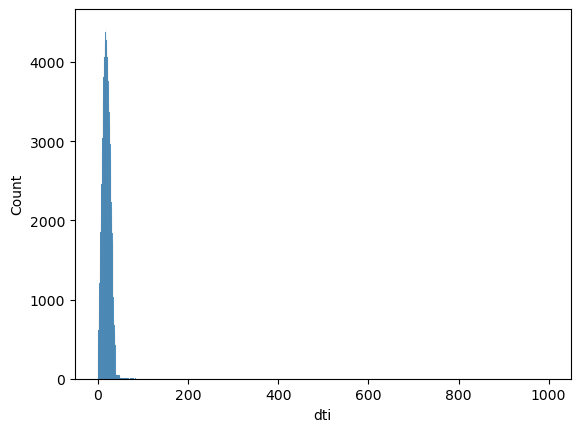

In [46]:
sns.histplot(undersampled_df2['dti'])

<Axes: >

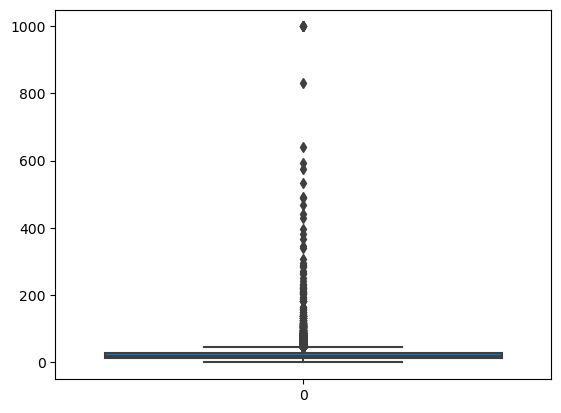

In [47]:
sns.boxplot(undersampled_df2['dti'])

In [48]:
undersampled_df2['mths_since_last_delinq'].describe()

count    133211.000000
mean         33.863998
std          21.988721
min           0.000000
25%          15.000000
50%          30.000000
75%          50.000000
max         226.000000
Name: mths_since_last_delinq, dtype: float64

<Axes: >

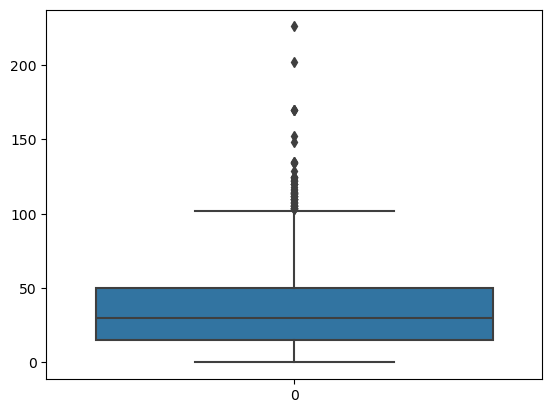

In [49]:
sns.boxplot(undersampled_df2['mths_since_last_delinq'])

In [50]:
# emp_length - mode
# annual_inc - median
# dti - median
# mths_since_last_delinq - median
# open_act - median
# pub_rec - median
# revol_util - median
# total_acc - median
# collections_12_mths_ex_med - 0
# acc_now_delinq - 0
# tot_coll_amt - median
# tot_cur_bal - median
# open_acc_6m - median
# open_act_il - median
# open_il_12m - median
# open_il_24m - median
# mths_since_rcnt_il - median
# total_bal_il - median
# il_util - median
# open_rv_12m - median
# open_rv_24m - median
# max_bal_bc - median
# all_util - median
# total_rev_hi_lim -  median                
# inq_fi - median                      
# total_cu_tl median
# inq_last_12m - median                    
# acc_open_past_24mths - median             
# avg_cur_bal - median                       
# bc_open_to_buy - median                    
# bc_util - median                        
# chargeoff_within_12_mths - 0            
# delinq_amnt - mode                       
# mo_sin_old_il_acct -   median             
# mo_sin_old_rev_tl_op  - median            
# mo_sin_rcnt_rev_tl_op  - median    
# mo_sin_rcnt_tl - median                  
# mort_acc  - median                         
# mths_since_recent_bc  - median             
# mths_since_recent_inq - median             
# mths_since_recent_revol_delinq - mode
# num_accts_ever_120_pd - mode
# num_actv_bc_tl                     median
# num_actv_rev_tl                    median
# num_bc_sats                         median
# num_bc_tl                          median
# num_il_tl                          median
# num_op_rev_tl                      median
# num_rev_accts                      median
# num_rev_tl_bal_gt_0               median
# num_sats                            median
# num_tl_120dpd_2m                   zero
# num_tl_30dpd                       zero
# num_tl_90g_dpd_24m                 zero
# num_tl_op_past_12m                 median
# pct_tl_nvr_dlq                     mode
# percent_bc_gt_75                   median
# pub_rec_bankruptcies               mode
# tax_liens                          median 
# tot_hi_cred_lim                    median
# total_bal_ex_mort                   median
# total_bc_limit                     median
# total_il_high_credit_limit  -      median

In [51]:
undersampled_df2['tot_hi_cred_lim'].describe()

count    2.495510e+05
mean     1.533816e+05
std      1.590429e+05
min      0.000000e+00
25%      4.578550e+04
50%      9.272000e+04
75%      2.192780e+05
max      9.999999e+06
Name: tot_hi_cred_lim, dtype: float64

In [52]:
undersampled_df2['pub_rec_bankruptcies'].median()

0.0

<Axes: >

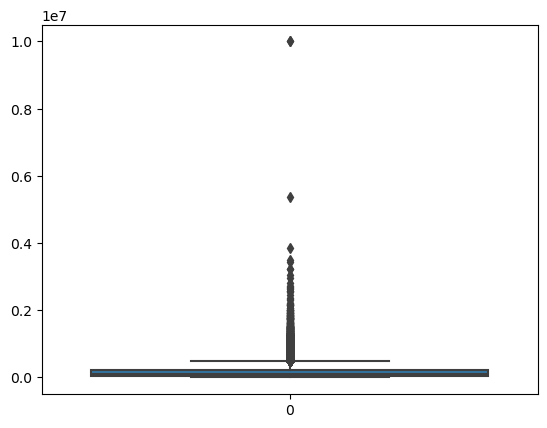

In [53]:
sns.boxplot(undersampled_df2['tot_hi_cred_lim'])

In [54]:
undersampled_df2['tot_hi_cred_lim'].median()

92720.0

<Axes: xlabel='tot_hi_cred_lim', ylabel='Count'>

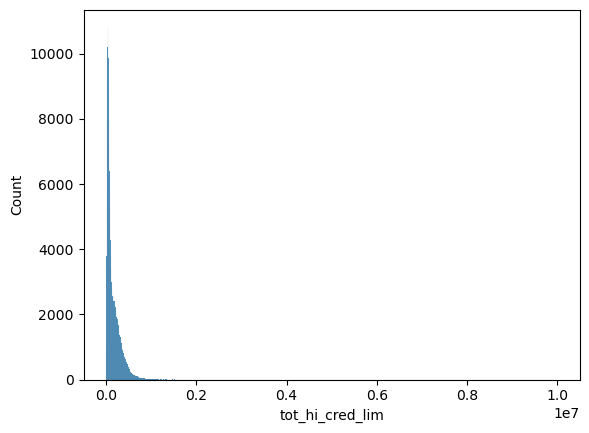

In [55]:
sns.histplot(undersampled_df2['tot_hi_cred_lim'])

<Axes: xlabel='tot_hi_cred_lim', ylabel='Density'>

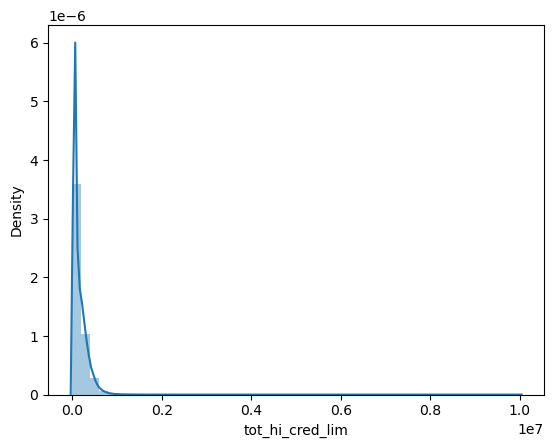

In [56]:
sns.distplot(undersampled_df2['tot_hi_cred_lim'])

In [57]:
undersampled_df2['mths_since_rcnt_il'].describe()

count    106921.000000
mean         18.713040
std          24.784984
min           0.000000
25%           6.000000
50%          11.000000
75%          20.000000
max         511.000000
Name: mths_since_rcnt_il, dtype: float64

In [58]:
undersampled_df2['mths_since_rcnt_il'].mean()

18.713040469131414

<Axes: xlabel='mths_since_rcnt_il', ylabel='Count'>

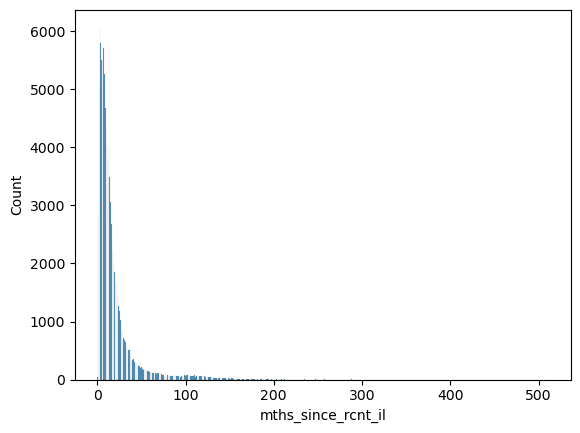

In [59]:
sns.histplot(undersampled_df2['mths_since_rcnt_il'])

<Axes: >

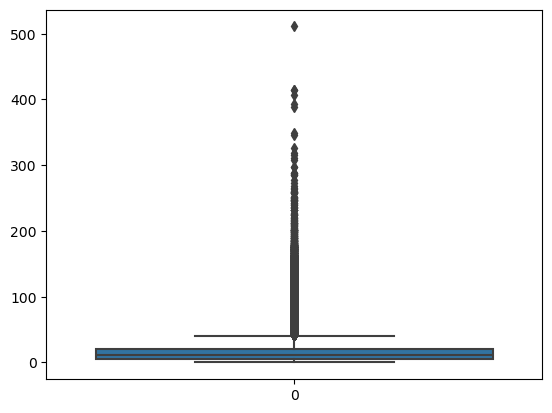

In [60]:
sns.boxplot(undersampled_df2['mths_since_rcnt_il'])

In [61]:
undersampled_df2.drop(columns=['emp_title','title'],axis=1,inplace=True)

In [62]:
undersampled_df2.shape

(261276, 94)

In [63]:
undersampled_df2['open_acc'].describe()

count    261270.000000
mean         11.824622
std           5.604431
min           0.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          76.000000
Name: open_acc, dtype: float64

<Axes: >

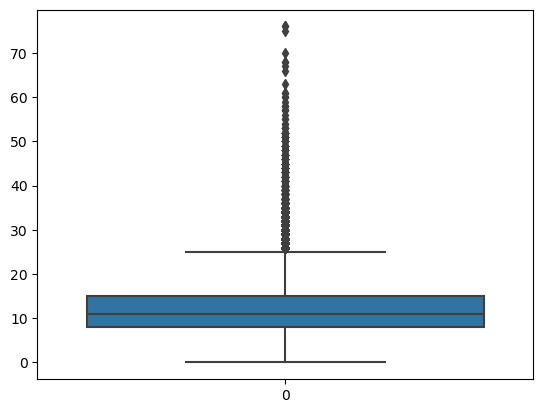

In [64]:
sns.boxplot(undersampled_df2['open_acc'])

In [65]:
undersampled_df2.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status,region,months_to_issue
0,3025,36,7.97,94.76,A,A5,6 years,RENT,38000.0,Source Verified,2017-07-01,n,small_business,19.24,1.0,2000-10-01,0.0,21.0,8.0,0.0,1291,56.10,32.0,f,0.0,0.0,205.25,0.00,0.00,0.0,94.76,0.0,1,Individual,0.0,0.0,107553.0,0.0,4.0,1.0,2.0,12.0,106262.0,70.0,0.0,2.0,807.0,69.0,2300.0,5.0,1.0,6.0,4.0,13444.0,9.0,99.3,0.0,0.0,201.0,196.0,16.0,12.0,0.0,16.0,7.0,NaN,1.0,2.0,2.0,2.0,2.0,26.0,4.0,6.0,2.0,8.0,0.0,0.0,1.0,1.0,96.7,100.0,0.0,0.0,100396.0,107553.0,1300.0,98096.0,N,Cash,N,1.0,Eastern,203
1,20000,60,22.70,560.37,E,E5,5 years,RENT,110000.0,Source Verified,2013-07-01,n,debt_consolidation,23.57,0.0,2009-04-01,1.0,NaN,11.0,0.0,4366,42.80,15.0,w,0.0,0.0,6831.79,0.00,7815.00,1406.7,560.37,0.0,1,Individual,0.0,0.0,93867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,8.0,8533.0,1852.0,47.1,0.0,0.0,49.0,51.0,15.0,8.0,0.0,25.0,1.0,NaN,0.0,2.0,5.0,2.0,2.0,9.0,6.0,6.0,5.0,11.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,115639.0,93867.0,3500.0,105439.0,N,Cash,Y,1.0,Pacific,51
2,21100,36,18.55,768.65,E,E2,5 years,RENT,48000.0,Verified,2015-09-01,n,debt_consolidation,26.86,0.0,2000-08-01,0.0,24.0,15.0,0.0,11901,46.70,47.0,f,0.0,0.0,6643.79,38.43,0.00,0.0,807.08,1.0,1,Individual,0.0,166.0,70914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25500.0,NaN,NaN,NaN,8.0,4728.0,2512.0,82.6,0.0,0.0,180.0,120.0,11.0,3.0,0.0,11.0,4.0,24.0,0.0,4.0,5.0,4.0,4.0,36.0,11.0,11.0,5.0,15.0,0.0,0.0,0.0,2.0,95.2,50.0,0.0,0.0,98743.0,70914.0,14400.0,73243.0,N,Cash,N,1.0,Central,183
3,25000,60,15.58,502.40,D,D3,10+ years,MORTGAGE,68000.0,Source Verified,2010-09-01,n,small_business,0.60,0.0,1993-10-01,4.0,NaN,2.0,0.0,0,1.88,29.0,f,0.0,0.0,2800.91,0.00,9.35,0.0,502.40,0.0,1,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,Cash,N,1.0,Pacific,205
4,6500,36,6.92,200.47,A,A4,3 years,RENT,42000.0,Source Verified,2015-05-01,n,credit_card,9.11,0.0,1993-12-01,0.0,69.0,5.0,0.0,8762,71.80,14.0,w,0.0,0.0,667.28,0.00,0.00,0.0,1957.56,0.0,1,Individual,0.0,0.0,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12200.0,NaN,NaN,NaN,5.0,1752.0,396.0,94.7,0.0,0.0,139.0,257.0,16.0,16.0,1.0,104.0,16.0,NaN,0.0,1.0,5.0,1.0,2.0,5.0,5.0,8.0,5.0,5.0,0.0,0.0,0.0,0.0,85.7,100.0,0.0,0.0,12200.0,8762.0,7500.0,0.0,N,Cash,N,0.0,Central,260


In [66]:
# 1 and 0 - done
# look boxplot for outliers
# capping, ouliers for 75%, 90%
# uni - 
# scatter plot - target variable
# columns - related and interesting - grade, drop subgrade, drop issue_d, drop earliest_cr_line, drop addr_state,  - done
# categorical columns - value counts - see the distribution - merge in one class in others - done
# uni & categorical column
# bivar - bar chart along with target variable
# encoding
# transformation - scaling 
# test & train split
# base model

In [67]:
undersampled_df2.drop(columns="sub_grade",axis=1,inplace=True)

In [68]:
undersampled_df2.drop(columns="issue_d",axis=1,inplace=True)

In [69]:
undersampled_df2.drop(columns="earliest_cr_line",axis=1,inplace=True)

In [70]:
paid = ["Does not meet the credit policy. Status:Fully Paid", "Fully Paid"]

# good_loan -1 bad_loan - 0
not_paid = ['Does not meet the credit policy. Status:Charged Off', 'Charged Off','Default']

df['loan_condition'] = np.nan

def loan_type(status):
    if status in not_paid:
        return 0
    elif status in paid:
        return 1

df['current_loan_status']=df['loan_status'].apply(loan_type)

In [71]:
undersampled_df2.shape

(261276, 91)

In [72]:
undersampled_df2.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status,region,months_to_issue
0,3025,36,7.97,94.76,A,6 years,RENT,38000.0,Source Verified,n,small_business,19.24,1.0,0.0,21.0,8.0,0.0,1291,56.10,32.0,f,0.0,0.0,205.25,0.00,0.00,0.0,94.76,0.0,1,Individual,0.0,0.0,107553.0,0.0,4.0,1.0,2.0,12.0,106262.0,70.0,0.0,2.0,807.0,69.0,2300.0,5.0,1.0,6.0,4.0,13444.0,9.0,99.3,0.0,0.0,201.0,196.0,16.0,12.0,0.0,16.0,7.0,NaN,1.0,2.0,2.0,2.0,2.0,26.0,4.0,6.0,2.0,8.0,0.0,0.0,1.0,1.0,96.7,100.0,0.0,0.0,100396.0,107553.0,1300.0,98096.0,N,Cash,N,1.0,Eastern,203
1,20000,60,22.70,560.37,E,5 years,RENT,110000.0,Source Verified,n,debt_consolidation,23.57,0.0,1.0,NaN,11.0,0.0,4366,42.80,15.0,w,0.0,0.0,6831.79,0.00,7815.00,1406.7,560.37,0.0,1,Individual,0.0,0.0,93867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,8.0,8533.0,1852.0,47.1,0.0,0.0,49.0,51.0,15.0,8.0,0.0,25.0,1.0,NaN,0.0,2.0,5.0,2.0,2.0,9.0,6.0,6.0,5.0,11.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,115639.0,93867.0,3500.0,105439.0,N,Cash,Y,1.0,Pacific,51
2,21100,36,18.55,768.65,E,5 years,RENT,48000.0,Verified,n,debt_consolidation,26.86,0.0,0.0,24.0,15.0,0.0,11901,46.70,47.0,f,0.0,0.0,6643.79,38.43,0.00,0.0,807.08,1.0,1,Individual,0.0,166.0,70914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25500.0,NaN,NaN,NaN,8.0,4728.0,2512.0,82.6,0.0,0.0,180.0,120.0,11.0,3.0,0.0,11.0,4.0,24.0,0.0,4.0,5.0,4.0,4.0,36.0,11.0,11.0,5.0,15.0,0.0,0.0,0.0,2.0,95.2,50.0,0.0,0.0,98743.0,70914.0,14400.0,73243.0,N,Cash,N,1.0,Central,183
3,25000,60,15.58,502.40,D,10+ years,MORTGAGE,68000.0,Source Verified,n,small_business,0.60,0.0,4.0,NaN,2.0,0.0,0,1.88,29.0,f,0.0,0.0,2800.91,0.00,9.35,0.0,502.40,0.0,1,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,Cash,N,1.0,Pacific,205
4,6500,36,6.92,200.47,A,3 years,RENT,42000.0,Source Verified,n,credit_card,9.11,0.0,0.0,69.0,5.0,0.0,8762,71.80,14.0,w,0.0,0.0,667.28,0.00,0.00,0.0,1957.56,0.0,1,Individual,0.0,0.0,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12200.0,NaN,NaN,NaN,5.0,1752.0,396.0,94.7,0.0,0.0,139.0,257.0,16.0,16.0,1.0,104.0,16.0,NaN,0.0,1.0,5.0,1.0,2.0,5.0,5.0,8.0,5.0,5.0,0.0,0.0,0.0,0.0,85.7,100.0,0.0,0.0,12200.0,8762.0,7500.0,0.0,N,Cash,N,0.0,Central,260


In [73]:
undersampled_df2['current_loan_status'].value_counts()

current_loan_status
1.0    208786
0.0     52490
Name: count, dtype: int64

In [74]:
undersampled_df2.to_csv("june-1-24-sampledata.csv")

In [75]:
undersampled_df2.head(50)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status,region,months_to_issue
0,3025,36,7.97,94.76,A,6 years,RENT,38000.0,Source Verified,n,small_business,19.24,1.0,0.0,21.0,8.0,0.0,1291,56.10,32.0,f,0.0,0.0,205.25,0.00,0.00,0.0000,94.76,0.0,1,Individual,0.0,0.0,107553.0,0.0,4.0,1.0,2.0,12.0,106262.0,70.0,0.0,2.0,807.0,69.0,2300.0,5.0,1.0,6.0,4.0,13444.0,9.0,99.3,0.0,0.0,201.0,196.0,16.0,12.0,0.0,16.0,7.0,NaN,1.0,2.0,2.0,2.0,2.0,26.0,4.0,6.0,2.0,8.0,0.0,0.0,1.0,1.0,96.7,100.0,0.0,0.0,100396.0,107553.0,1300.0,98096.0,N,Cash,N,1.0,Eastern,203
1,20000,60,22.70,560.37,E,5 years,RENT,110000.0,Source Verified,n,debt_consolidation,23.57,0.0,1.0,NaN,11.0,0.0,4366,42.80,15.0,w,0.0,0.0,6831.79,0.00,7815.00,1406.7000,560.37,0.0,1,Individual,0.0,0.0,93867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,8.0,8533.0,1852.0,47.1,0.0,0.0,49.0,51.0,15.0,8.0,0.0,25.0,1.0,NaN,0.0,2.0,5.0,2.0,2.0,9.0,6.0,6.0,5.0,11.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,115639.0,93867.0,3500.0,105439.0,N,Cash,Y,1.0,Pacific,51
2,21100,36,18.55,768.65,E,5 years,RENT,48000.0,Verified,n,debt_consolidation,26.86,0.0,0.0,24.0,15.0,0.0,11901,46.70,47.0,f,0.0,0.0,6643.79,38.43,0.00,0.0000,807.08,1.0,1,Individual,0.0,166.0,70914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25500.0,NaN,NaN,NaN,8.0,4728.0,2512.0,82.6,0.0,0.0,180.0,120.0,11.0,3.0,0.0,11.0,4.0,24.0,0.0,4.0,5.0,4.0,4.0,36.0,11.0,11.0,5.0,15.0,0.0,0.0,0.0,2.0,95.2,50.0,0.0,0.0,98743.0,70914.0,14400.0,73243.0,N,Cash,N,1.0,Central,183
3,25000,60,15.58,502.40,D,10+ years,MORTGAGE,68000.0,Source Verified,n,small_business,0.60,0.0,4.0,NaN,2.0,0.0,0,1.88,29.0,f,0.0,0.0,2800.91,0.00,9.35,0.0000,502.40,0.0,1,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,Cash,N,1.0,Pacific,205
4,6500,36,6.92,200.47,A,3 years,RENT,42000.0,Source Verified,n,credit_card,9.11,0.0,0.0,69.0,5.0,0.0,8762,71.80,14.0,w,0.0,0.0,667.28,0.00,0.00,0.0000,1957.56,0.0,1,Individual,0.0,0.0,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12200.0,NaN,NaN,NaN,5.0,1752.0,396.0,94.7,0.0,0.0,139.0,257.0,16.0,16.0,1.0,104.0,16.0,NaN,0.0,1.0,5.0,1.0,2.0,5.0,5.0,8.0,5.0,5.0,0.0,0.0,0.0,0.0,85.7,100.0,0.0,0.0,12200.0,8762.0,7500.0,0.0,N,Cash,N,0.0,Central,260
5,4000,36,8.18,125.68,B,9 years,OWN,46000.0,Not Verified,n,car,10.33,0.0,1.0,NaN,5.0,1.0,1386,9.70,21.0,w,0.0,0.0,52.04,0.00,823.03,148.1454,125.68,0.0,1,Individual,0.0,0.0,14028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14300.0,NaN,NaN,NaN,4.0,2806.0,3414.0,28.9,0.0,0.0,125.0,139.0,23.0,10.0,2.0,33.0,4.0,NaN,0.0,1.0,1.0,2.0,4.0,10.0,4.0,9.0,1.0,5.0,0.0,0.0,0.0,1.0,100.0,0.0,1.0,0.

In [76]:
undersampled_df2['delinq_2yrs'].value_counts()

delinq_2yrs
0.0     207938
1.0      34613
2.0      10700
3.0       3974
4.0       1838
5.0        924
6.0        512
7.0        277
8.0        172
9.0        106
10.0        62
11.0        46
12.0        37
13.0        23
14.0        18
16.0         8
15.0         8
17.0         5
19.0         4
18.0         4
20.0         3
21.0         2
25.0         1
27.0         1
Name: count, dtype: int64

In [77]:
undersampled_df6 = undersampled_df2.copy()

In [78]:
undersampled_df6.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,current_loan_status,region,months_to_issue
0,3025,36,7.97,94.76,A,6 years,RENT,38000.0,Source Verified,n,small_business,19.24,1.0,0.0,21.0,8.0,0.0,1291,56.10,32.0,f,0.0,0.0,205.25,0.00,0.00,0.0,94.76,0.0,1,Individual,0.0,0.0,107553.0,0.0,4.0,1.0,2.0,12.0,106262.0,70.0,0.0,2.0,807.0,69.0,2300.0,5.0,1.0,6.0,4.0,13444.0,9.0,99.3,0.0,0.0,201.0,196.0,16.0,12.0,0.0,16.0,7.0,NaN,1.0,2.0,2.0,2.0,2.0,26.0,4.0,6.0,2.0,8.0,0.0,0.0,1.0,1.0,96.7,100.0,0.0,0.0,100396.0,107553.0,1300.0,98096.0,N,Cash,N,1.0,Eastern,203
1,20000,60,22.70,560.37,E,5 years,RENT,110000.0,Source Verified,n,debt_consolidation,23.57,0.0,1.0,NaN,11.0,0.0,4366,42.80,15.0,w,0.0,0.0,6831.79,0.00,7815.00,1406.7,560.37,0.0,1,Individual,0.0,0.0,93867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,8.0,8533.0,1852.0,47.1,0.0,0.0,49.0,51.0,15.0,8.0,0.0,25.0,1.0,NaN,0.0,2.0,5.0,2.0,2.0,9.0,6.0,6.0,5.0,11.0,0.0,0.0,0.0,1.0,100.0,50.0,0.0,0.0,115639.0,93867.0,3500.0,105439.0,N,Cash,Y,1.0,Pacific,51
2,21100,36,18.55,768.65,E,5 years,RENT,48000.0,Verified,n,debt_consolidation,26.86,0.0,0.0,24.0,15.0,0.0,11901,46.70,47.0,f,0.0,0.0,6643.79,38.43,0.00,0.0,807.08,1.0,1,Individual,0.0,166.0,70914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25500.0,NaN,NaN,NaN,8.0,4728.0,2512.0,82.6,0.0,0.0,180.0,120.0,11.0,3.0,0.0,11.0,4.0,24.0,0.0,4.0,5.0,4.0,4.0,36.0,11.0,11.0,5.0,15.0,0.0,0.0,0.0,2.0,95.2,50.0,0.0,0.0,98743.0,70914.0,14400.0,73243.0,N,Cash,N,1.0,Central,183
3,25000,60,15.58,502.40,D,10+ years,MORTGAGE,68000.0,Source Verified,n,small_business,0.60,0.0,4.0,NaN,2.0,0.0,0,1.88,29.0,f,0.0,0.0,2800.91,0.00,9.35,0.0,502.40,0.0,1,Individual,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,N,Cash,N,1.0,Pacific,205
4,6500,36,6.92,200.47,A,3 years,RENT,42000.0,Source Verified,n,credit_card,9.11,0.0,0.0,69.0,5.0,0.0,8762,71.80,14.0,w,0.0,0.0,667.28,0.00,0.00,0.0,1957.56,0.0,1,Individual,0.0,0.0,8762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12200.0,NaN,NaN,NaN,5.0,1752.0,396.0,94.7,0.0,0.0,139.0,257.0,16.0,16.0,1.0,104.0,16.0,NaN,0.0,1.0,5.0,1.0,2.0,5.0,5.0,8.0,5.0,5.0,0.0,0.0,0.0,0.0,85.7,100.0,0.0,0.0,12200.0,8762.0,7500.0,0.0,N,Cash,N,0.0,Central,260


In [79]:
undersampled_df6['delinq_2yrs'].value_counts()

delinq_2yrs
0.0     207938
1.0      34613
2.0      10700
3.0       3974
4.0       1838
5.0        924
6.0        512
7.0        277
8.0        172
9.0        106
10.0        62
11.0        46
12.0        37
13.0        23
14.0        18
16.0         8
15.0         8
17.0         5
19.0         4
18.0         4
20.0         3
21.0         2
25.0         1
27.0         1
Name: count, dtype: int64

In [80]:
columns_to_impute = ['annual_inc', 'dti', 'mths_since_last_delinq', 'pub_rec', 'revol_util', 'total_acc', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util','mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_op_past_12m', 'percent_bc_gt_75', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']
undersampled_df6[columns_to_impute] = undersampled_df6[columns_to_impute].apply(lambda x: x.fillna(x.median()))

In [81]:
columns_to_impute_mode = ['emp_length', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies']
undersampled_df6[columns_to_impute_mode] = undersampled_df6[columns_to_impute_mode].apply(lambda x: x.fillna(x.mode()[0]))

In [82]:
columns_to_impute_zero = ['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m']
undersampled_df6[columns_to_impute_zero] = undersampled_df6[columns_to_impute_zero].apply(lambda x: x.fillna(0))

In [83]:
columns_to_impute_mean = ['acc_open_past_24mths' ]
undersampled_df6[columns_to_impute_mean] = undersampled_df6[columns_to_impute_mean].apply(lambda x: x.fillna(x.mean()))

In [84]:
undersampled_df6['acc_open_past_24mths'].isnull().sum()

0

In [85]:
undersampled_df6['delinq_amnt']=undersampled_df6['delinq_amnt'].fillna(undersampled_df6['delinq_amnt'].median())

In [86]:
undersampled_df6['delinq_amnt'].isnull().sum()

0

In [87]:
undersampled_df6['open_acc']=undersampled_df6['open_acc'].fillna(undersampled_df6['open_acc'].median())


In [88]:
undersampled_df6['inq_last_6mths']=undersampled_df6['inq_last_6mths'].fillna(undersampled_df6['inq_last_6mths'].median())


In [89]:
undersampled_df6['inq_last_6mths'].isnull().sum()

0

In [90]:
undersampled_df6['delinq_amnt'].isnull().sum()

0

In [91]:
undersampled_df6.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
pymnt_plan                        0
purpose                           0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
mths_since_last_delinq            0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt             

In [92]:
undersampled_df6.dtypes

loan_amnt                           int64
term                                int64
int_rate                          float64
installment                       float64
grade                              object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
pymnt_plan                         object
purpose                            object
dti                               float64
delinq_2yrs                       float64
inq_last_6mths                    float64
mths_since_last_delinq            float64
open_acc                          float64
pub_rec                           float64
revol_bal                           int64
revol_util                        float64
total_acc                         float64
initial_list_status                object
out_prncp                         float64
out_prncp_inv                     float64
total_rec_int                     

In [93]:
loan_amnt                           int64 - Anmol
term                                int64 - category
int_rate                          float64 - 
installment                       float64
annual_inc                        float64
dti                               float64
delinq_2yrs                       float64
inq_last_6mths                    float64
mths_since_last_delinq            float64
open_acc                          float64

pub_rec  - float64 - no change - Divya
revol_bal - int64 - 95% 41144.0
revol_util - 95% 92.3
total_acc - 0.99 61.0
out_prncp - no change
out_prncp_inv - no change
total_rec_int - 0.95 8019.79
total_rec_late_fee - 0.90 15.0
recoveries - 0.95 
collection_recovery_fee - 0.95 676.102950000625

last_pymnt_amnt                   float64 - 4000.0 -Pavan
collections_12_mths_ex_med        float64 - 0.0
policy_code                         int64 - 1.0
acc_now_delinq                    float64 - 0.0
tot_coll_amt                      float64 - 250.0
tot_cur_bal                       float64 - 308584.0
open_acc_6m                       float64 - 3.0
open_act_il                       float64 - 10.0
open_il_12m                       float64 - 5.0
open_il_24m                       float64 - 10.0

mths_since_rcnt_il                float64  - 21.0
total_bal_il                      float64  - 48356
il_util                           float64  - 76.0
open_rv_12m                       float64  - 3.0
open_rv_24m                       float64  - 5.0
max_bal_bc                        float64  - 7004.0
all_util                          float64  - 76.0
total_rev_hi_lim                  float64  - 56600.0
inq_fi                            float64  - no changes
total_cu_tl                       float64  - no changes

inq_last_12m                      float64 - 4.0
acc_open_past_24mths              float64 - 9.0
avg_cur_bal                       float64 - 27379.5
bc_open_to_buy                    float64 - 20399.0
bc_util                           float64 - 150
chargeoff_within_12_mths          float64 - no changes
delinq_amnt                       float64 - no changes
mo_sin_old_il_acct                float64 - 186.0
mo_sin_old_rev_tl_op              float64 - 300.0
mo_sin_rcnt_rev_tl_op             float64 - 30.0

mo_sin_rcnt_tl                    float64 - Anmol
mort_acc                          float64
mths_since_recent_bc              float64
mths_since_recent_inq             float64
mths_since_recent_revol_delinq    float64
num_accts_ever_120_pd             float64
num_actv_bc_tl                    float64
num_actv_rev_tl                   float64
num_bc_sats                       float64

num_bc_tl                         float64 - Divya
num_il_tl                         float64
num_op_rev_tl                     float64
num_rev_accts                     float64
num_rev_tl_bal_gt_0               float64
num_sats                          float64 
num_tl_120dpd_2m                  float64 - no change
num_tl_30dpd                      float64 - no change
num_tl_90g_dpd_24m                float64 
num_tl_op_past_12m                float64

pct_tl_nvr_dlq                    float64 - 100.0   - Pavan
percent_bc_gt_75                  float64 - 100.0
pub_rec_bankruptcies              float64 - 1.0
tax_liens                         float64 - 30.0
tot_hi_cred_lim                   float64 - 356372.0
total_bal_ex_mort                 float64 - 98216.0
total_bc_limit                    float64 - 41600.0
total_il_high_credit_limit        float64 - 89919.0
current_loan_status               float64 - 1.0
months_to_issue                     int64 - 316

SyntaxError: invalid syntax (1935650460.py, line 1)

In [ ]:
# for outliers
undersampled_df7 = undersampled_df6.copy() 

In [ ]:
undersampled_df7['total_cu_tl'].value_counts()

total_cu_tl
0.0     209638
1.0      18393
2.0      10277
3.0       6538
4.0       4512
5.0       3063
6.0       2289
7.0       1647
8.0       1203
9.0        925
10.0       657
11.0       512
12.0       394
13.0       272
14.0       213
15.0       153
16.0       148
17.0        97
19.0        63
18.0        61
22.0        37
20.0        35
21.0        27
24.0        26
23.0        23
26.0        14
25.0        13
30.0        10
28.0         7
32.0         5
27.0         4
29.0         3
33.0         2
37.0         2
35.0         2
34.0         2
45.0         1
44.0         1
41.0         1
54.0         1
40.0         1
31.0         1
48.0         1
38.0         1
42.0         1
Name: count, dtype: int64

<Axes: >

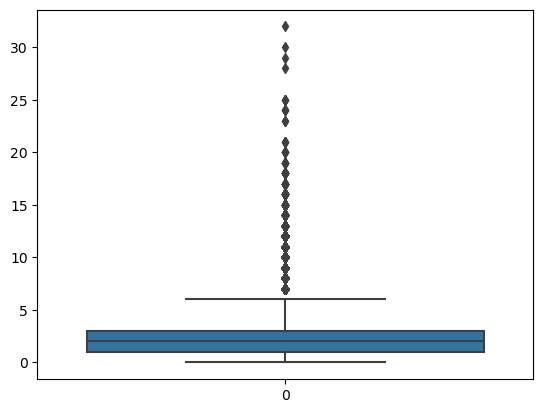

In [ ]:
# mths_since_rcnt_il 
sns.boxplot(undersampled_df7['num_tl_op_past_12m'])

In [ ]:
undersampled_df7['num_tl_op_past_12m'].describe()

count    261276.000000
mean          2.396217
std           1.911696
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          32.000000
Name: num_tl_op_past_12m, dtype: float64

<Axes: xlabel='num_tl_op_past_12m', ylabel='Density'>

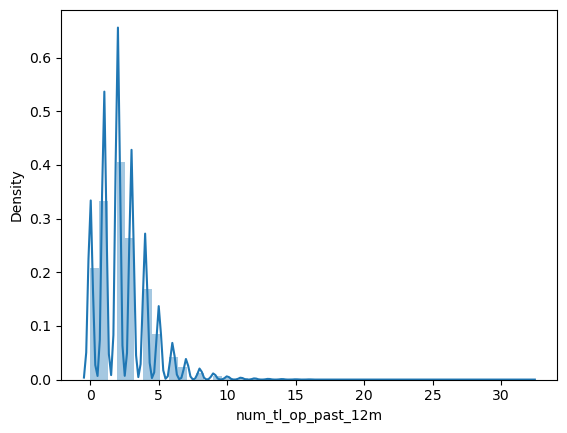

In [ ]:
sns.distplot(undersampled_df7['num_tl_op_past_12m'])

In [ ]:
undersampled_df6['num_tl_op_past_12m'].quantile(0.95)

6.0

In [ ]:
undersampled_df7['open_rv_24m'].mode()

0    3.0
Name: open_rv_24m, dtype: float64

In [ ]:
undersampled_df7['total_rev_hi_lim'].median()

22500.0

In [ ]:
undersampled_df7['il_util'] = np.where(undersampled_df7['il_util'] > 76.0, 76.0, undersampled_df7['il_util'])

In [ ]:
undersampled_df7['open_rv_24m'] = np.where(undersampled_df7['open_rv_24m'] > 5.0, 5.0, undersampled_df7['open_rv_24m'])

In [ ]:
undersampled_df7['mths_since_rcnt_il'] = np.where(undersampled_df7['mths_since_rcnt_il'] > 21.0, 21.0, undersampled_df7['mths_since_rcnt_il'])

In [ ]:
undersampled_df7['open_rv_12m'] = np.where(undersampled_df7['open_rv_12m'] > 3.0, 3.0, undersampled_df7['open_rv_12m'])

In [ ]:
undersampled_df7['total_bal_il'] = np.where(undersampled_df7['total_bal_il'] > 48356.0, 48356.0, undersampled_df7['total_bal_il'])

In [ ]:
undersampled_df7['max_bal_bc'] = np.where(undersampled_df7['max_bal_bc'] > 7004.0, 7004.0, undersampled_df7['max_bal_bc'])

In [ ]:
undersampled_df7['all_util'] = np.where(undersampled_df7['all_util'] > 76.0, 76.0, undersampled_df7['all_util'])

In [ ]:
undersampled_df7['total_rev_hi_lim'] = np.where(undersampled_df7['total_rev_hi_lim'] > 56600.0, 56600.0, undersampled_df7['total_rev_hi_lim'])

In [ ]:
undersampled_df7['inq_last_12m'] = np.where(undersampled_df7['inq_last_12m'] > 4.0, 4.0, undersampled_df7['inq_last_12m'])

In [ ]:
undersampled_df7['acc_open_past_24mths'] = np.where(undersampled_df7['acc_open_past_24mths'] > 9.0, 9.0, undersampled_df7['acc_open_past_24mths'])

In [ ]:
undersampled_df7['avg_cur_bal'] = np.where(undersampled_df7['avg_cur_bal'] > 27379.5, 27379.5, undersampled_df7['avg_cur_bal'])

In [ ]:
undersampled_df7['bc_open_to_buy'] = np.where(undersampled_df7['bc_open_to_buy'] > 20399.0, 20399.0, undersampled_df7['bc_open_to_buy'])

In [ ]:
undersampled_df7['bc_util'] = np.where(undersampled_df7['bc_util'] > 150.0, 150.0, undersampled_df7['bc_util'])

In [ ]:
undersampled_df7['mo_sin_old_il_acct'] = np.where(undersampled_df7['mo_sin_old_il_acct'] > 186.0, 186.0, undersampled_df7['mo_sin_old_il_acct'])

In [ ]:
undersampled_df7['mo_sin_old_rev_tl_op'] = np.where(undersampled_df7['mo_sin_old_rev_tl_op'] > 300.0, 300.0, undersampled_df7['mo_sin_old_rev_tl_op'])

In [ ]:
undersampled_df7['mo_sin_rcnt_rev_tl_op'] = np.where(undersampled_df7['mo_sin_rcnt_rev_tl_op'] > 30.0, 30.0, undersampled_df7['mo_sin_rcnt_rev_tl_op'])

In [ ]:
undersampled_df7['last_pymnt_amnt'] = np.where(undersampled_df7['last_pymnt_amnt'] > 4000, 4000, undersampled_df7['last_pymnt_amnt'])
undersampled_df7['last_pymnt_amnt'].max()

4000.0

In [ ]:
undersampled_df7['collections_12_mths_ex_med'] = np.where(undersampled_df7['collections_12_mths_ex_med'] > 0, 0, undersampled_df7['collections_12_mths_ex_med'])
undersampled_df7['collections_12_mths_ex_med'].max()

0.0

In [ ]:
undersampled_df7['policy_code'] = np.where(undersampled_df7['policy_code'] > 1, 1, undersampled_df7['policy_code'])

In [ ]:
undersampled_df7['last_pymnt_amnt'] = np.where(undersampled_df7['last_pymnt_amnt'] > 4000, 4000, undersampled_df7['last_pymnt_amnt'])
undersampled_df7['last_pymnt_amnt'].max()

4000.0

In [ ]:
undersampled_df7['collections_12_mths_ex_med'] = np.where(undersampled_df7['collections_12_mths_ex_med'] > 0, 0, undersampled_df7['collections_12_mths_ex_med'])
undersampled_df7['collections_12_mths_ex_med'].max()

0.0

In [ ]:
undersampled_df7['policy_code'] = np.where(undersampled_df7['policy_code'] > 1, 1, undersampled_df7['policy_code'])
undersampled_df7['policy_code'].max()

1

In [ ]:
undersampled_df7['acc_now_delinq'] = np.where(undersampled_df7['acc_now_delinq'] > 0, 0, undersampled_df7['acc_now_delinq'])
undersampled_df7['acc_now_delinq'].max()

0.0

In [ ]:
undersampled_df7['tot_coll_amt'] = np.where(undersampled_df7['tot_coll_amt'] > 250, 250, undersampled_df7['tot_coll_amt'])
undersampled_df7['tot_coll_amt'].max()

250.0

In [ ]:
undersampled_df7['tot_cur_bal'] = np.where(undersampled_df7['tot_cur_bal'] > 308584, 308584, undersampled_df7['tot_cur_bal'])
undersampled_df7['tot_cur_bal'].max()

308584.0

In [ ]:
undersampled_df7['open_act_il'] = np.where(undersampled_df7['open_act_il'] > 10, 10, undersampled_df7['open_act_il'])
undersampled_df7['open_act_il'].max()

10.0

In [ ]:
undersampled_df7['open_il_12m'] = np.where(undersampled_df7['open_il_12m'] > 5, 5, undersampled_df7['open_il_12m'])
undersampled_df7['open_il_12m'].max()

5.0

In [ ]:
undersampled_df7['open_il_24m'] = np.where(undersampled_df7['open_il_24m'] > 10, 10, undersampled_df7['open_il_24m'])
undersampled_df7['open_il_24m'].max()

10.0

In [ ]:
undersampled_df7['pct_tl_nvr_dlq'] = np.where(undersampled_df7['pct_tl_nvr_dlq'] > 100, 100, undersampled_df7['pct_tl_nvr_dlq'])
undersampled_df7['pct_tl_nvr_dlq'].max()

100.0

In [ ]:
undersampled_df7['percent_bc_gt_75'] = np.where(undersampled_df7['percent_bc_gt_75'] > 100, 100, undersampled_df7['percent_bc_gt_75'])
undersampled_df7['percent_bc_gt_75'].max()

100.0

In [ ]:
undersampled_df7['pub_rec_bankruptcies'] = np.where(undersampled_df7['pub_rec_bankruptcies'] > 1, 1, undersampled_df7['pub_rec_bankruptcies'])
undersampled_df7['pub_rec_bankruptcies'].max()

1.0

In [ ]:
undersampled_df7['tax_liens'] = np.where(undersampled_df7['tax_liens'] > 30, 30, undersampled_df7['tax_liens'])
undersampled_df7['tax_liens'].max()

30.0

In [ ]:
undersampled_df7['tot_hi_cred_lim'] = np.where(undersampled_df7['tot_hi_cred_lim'] > 356372, 356372, undersampled_df7['tot_hi_cred_lim'])
undersampled_df7['tot_hi_cred_lim'].max()

356372.0

In [ ]:
undersampled_df7['total_bal_ex_mort'] = np.where(undersampled_df7['total_bal_ex_mort'] > 98216, 98216, undersampled_df7['total_bal_ex_mort'])
undersampled_df7['total_bal_ex_mort'].max()

98216.0

In [ ]:
undersampled_df7['total_bc_limit'] = np.where(undersampled_df7['total_bc_limit'] > 41600, 41600, undersampled_df7['total_bc_limit'])
undersampled_df7['total_bc_limit'].max()

41600.0

In [ ]:
undersampled_df7['total_il_high_credit_limit'] = np.where(undersampled_df7['total_il_high_credit_limit'] > 89919, 89919, undersampled_df7['total_il_high_credit_limit'])
undersampled_df7['total_il_high_credit_limit'].max()

89919.0

In [ ]:
undersampled_df7['months_to_issue'] = np.where(undersampled_df7['months_to_issue'] > 316, 316, undersampled_df7['months_to_issue'])
undersampled_df7['months_to_issue'].max()

316

In [ ]:
undersampled_df7['open_acc_6m'] = np.where(undersampled_df7['open_acc_6m'] > 3.0, 3.0, undersampled_df7['open_acc_6m'])
undersampled_df7['open_acc_6m'].max()

3.0

In [ ]:
undersampled_df7['loan_amnt'] = np.where(undersampled_df7['loan_amnt'] > 37400, 37400, undersampled_df7['loan_amnt'])

In [ ]:
undersampled_df7['int_rate'] = np.where(undersampled_df7['int_rate'] > 22, 22, undersampled_df7['int_rate'])

In [ ]:
undersampled_df7['installment'] = np.where(undersampled_df7['installment'] > undersampled_df7.installment.quantile(q=0.99), undersampled_df7.installment.quantile(q=0.99), undersampled_df7['installment'])

In [ ]:
undersampled_df7['annual_inc'] = np.where(undersampled_df7['annual_inc'] > undersampled_df7.annual_inc.quantile(0.9), undersampled_df7.annual_inc.quantile(0.9), undersampled_df7['annual_inc'])

In [ ]:
undersampled_df7['annual_inc'] = np.where(undersampled_df7['annual_inc'] > undersampled_df7.annual_inc.quantile(0.9), undersampled_df7.annual_inc.quantile(0.9), undersampled_df7['annual_inc'])

In [ ]:
undersampled_df7['delinq_2yrs'] = np.where(undersampled_df7['delinq_2yrs'] > undersampled_df7.delinq_2yrs.quantile(0.99), undersampled_df7.delinq_2yrs.quantile(0.99), undersampled_df7['delinq_2yrs'])

In [ ]:
undersampled_df7['inq_last_6mths'] = np.where(undersampled_df7['inq_last_6mths'] > undersampled_df7.inq_last_6mths.quantile(0.99), undersampled_df7.inq_last_6mths.quantile(0.99), undersampled_df7['inq_last_6mths'])

In [ ]:
q1=undersampled_df7.mths_since_last_delinq.quantile(q=0.25)
q3=undersampled_df7.mths_since_last_delinq.quantile(q=0.75)
iqr=q3-q1
w=q3+(1.5*iqr)
undersampled_df7['mths_since_last_delinq'] = np.where(undersampled_df7['mths_since_last_delinq'] > w, w, undersampled_df7['mths_since_last_delinq'])

In [ ]:
q1=undersampled_df7.mort_acc.quantile(q=0.25)
q3=undersampled_df7.mort_acc.quantile(q=0.75)
iqr=q3-q1
w=q3+(1.5*iqr)
undersampled_df7['mort_acc'] = np.where(undersampled_df7['mort_acc'] > w, w, undersampled_df7['mort_acc'])

In [ ]:
undersampled_df7['mths_since_recent_bc'] = np.where(undersampled_df7['mths_since_recent_bc'] > undersampled_df7.mths_since_recent_bc.quantile(0.9), undersampled_df7.mths_since_recent_bc.quantile(0.9), undersampled_df7['mths_since_recent_bc'])

In [ ]:
q1=undersampled_df7.mths_since_recent_inq.quantile(q=0.25)
q3=undersampled_df7.mths_since_recent_inq.quantile(q=0.75)
iqr=q3-q1
w=q3+(1.5*iqr)
undersampled_df7['mths_since_recent_inq'] = np.where(undersampled_df7['mths_since_recent_inq'] > w, w, undersampled_df7['mths_since_recent_inq'])

In [ ]:
q1=undersampled_df7.mths_since_recent_revol_delinq.quantile(q=0.25)
q3=undersampled_df7.mths_since_recent_revol_delinq.quantile(q=0.75)
iqr=q3-q1
w=q3+(1.5*iqr)
undersampled_df7['mths_since_recent_revol_delinq'] = np.where(undersampled_df7['mths_since_recent_revol_delinq'] > w, w, undersampled_df7['mths_since_recent_revol_delinq'])

In [ ]:
undersampled_df7['num_accts_ever_120_pd'] = np.where(undersampled_df7['num_accts_ever_120_pd'] > 2, 2, undersampled_df7['num_accts_ever_120_pd'])
#undersampled_df7.num_accts_ever_120_pd.quantile(0.9)

In [ ]:
q1=undersampled_df7.num_actv_bc_tl.quantile(q=0.25)
q3=undersampled_df7.num_actv_bc_tl.quantile(q=0.75)
iqr=q3-q1
w=q3+(1.5*iqr)
undersampled_df7['num_actv_bc_tl'] = np.where(undersampled_df7['num_actv_bc_tl'] > w, w, undersampled_df7['num_actv_bc_tl'])

In [ ]:
q1=undersampled_df7.num_actv_rev_tl.quantile(q=0.25)
q3=undersampled_df7.num_actv_rev_tl.quantile(q=0.75)
iqr=q3-q1
w=q3+(1.5*iqr)
undersampled_df7['num_actv_rev_tl'] = np.where(undersampled_df7['num_actv_rev_tl'] > w, w, undersampled_df7['num_actv_rev_tl'])

In [ ]:
q1=undersampled_df7.num_bc_sats.quantile(q=0.25)
q3=undersampled_df7.num_bc_sats.quantile(q=0.75)
iqr=q3-q1
w=q3+(1.5*iqr)
undersampled_df7['num_bc_sats'] = np.where(undersampled_df7['num_bc_sats'] > w, w, undersampled_df7['num_bc_sats'])

In [ ]:
q1=undersampled_df7.num_bc_tl.quantile(q=0.25)
q3=undersampled_df7.num_bc_tl.quantile(q=0.75)
iqr=q3-q1
w=q3+(1.5*iqr)
undersampled_df7['num_bc_tl'] = np.where(undersampled_df7['num_bc_tl'] > w, w, undersampled_df7['num_bc_tl'])

In [ ]:
undersampled_df7['revol_bal'] = np.where(undersampled_df7['revol_bal'] > 41144.0, 41144.0, undersampled_df7['revol_bal'])

In [ ]:
undersampled_df7['revol_util'] = np.where(undersampled_df7['revol_util'] > 92.3, 92.3, undersampled_df7['revol_util'])

In [ ]:
undersampled_df7['total_acc'] = np.where(undersampled_df7['total_acc'] > 61.0, 61.0, undersampled_df7['total_acc'])

In [ ]:
undersampled_df7['total_rec_int'] = np.where(undersampled_df7['total_rec_int'] > 8019.79, 8019.79, undersampled_df7['total_rec_int'])

In [ ]:
undersampled_df7['recoveries'] = np.where(undersampled_df7['recoveries'] > 2740.8050000000003, 2740.8050000000003, undersampled_df7['recoveries'])

In [ ]:
undersampled_df7['collection_recovery_fee'] = np.where(undersampled_df7['collection_recovery_fee'] > 676.102950000625, 676.102950000625, undersampled_df7['collection_recovery_fee'])

In [ ]:
undersampled_df7['num_bc_tl'] = np.where(undersampled_df7['num_bc_tl'] > 21.0, 21.0, undersampled_df7['num_bc_tl'])

In [ ]:
undersampled_df7['num_il_tl'] = np.where(undersampled_df7['num_il_tl'] > 23.0, 23.0, undersampled_df7['num_il_tl'])

In [ ]:
undersampled_df7['num_op_rev_tl'] = np.where(undersampled_df7['num_op_rev_tl'] > 21.0, 21.0, undersampled_df7['num_op_rev_tl'])

In [ ]:
undersampled_df7['num_rev_tl_bal_gt_0'] = np.where(undersampled_df7['num_rev_tl_bal_gt_0'] > 16.0, 16.0, undersampled_df7['num_rev_tl_bal_gt_0'])

In [ ]:
undersampled_df7['num_sats'] = np.where(undersampled_df7['num_sats'] > 26.0, 26.0, undersampled_df7['num_sats'])

In [ ]:
undersampled_df7['num_tl_90g_dpd_24m'] = np.where(undersampled_df7['num_tl_90g_dpd_24m'] > 2.0, 2.0, undersampled_df7['num_tl_90g_dpd_24m'])

In [ ]:
undersampled_df7['num_tl_90g_dpd_24m'] = np.where(undersampled_df7['num_tl_90g_dpd_24m'] > 2.0, 2.0, undersampled_df7['num_tl_90g_dpd_24m'])

In [ ]:
undersampled_df7['num_tl_op_past_12m'] = np.where(undersampled_df7['num_tl_op_past_12m'] > 6.0, 6.0, undersampled_df7['num_tl_op_past_12m'])

In [ ]:
# converted "term" into categorical 
undersampled_df7['term']=undersampled_df['term'].astype(object)

In [ ]:
undersampled_df7['term'].dtypes

dtype('O')

<Axes: >

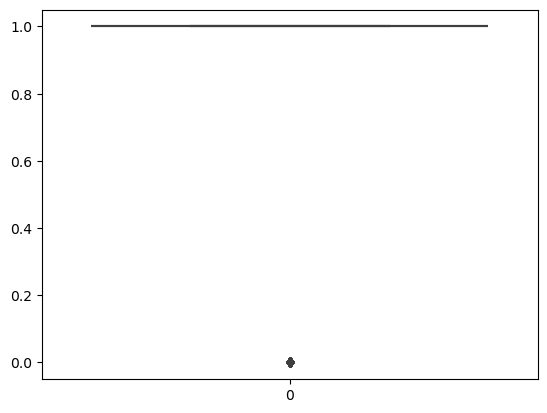

In [ ]:
sns.boxplot(undersampled_df6['current_loan_status'])

In [ ]:
undersampled_df6['current_loan_status'].value_counts()

current_loan_status
1.0    208786
0.0     52490
Name: count, dtype: int64

In [ ]:
undersampled_df8 = undersampled_df7.copy()

In [ ]:
undersampled_df8.to_csv("3-June-data.csv")

In [ ]:
undersampled_df8.shape

(261276, 91)

In [ ]:
undersampled_df8.dtypes

loan_amnt                           int64
term                               object
int_rate                          float64
installment                       float64
grade                              object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
pymnt_plan                         object
purpose                            object
dti                               float64
delinq_2yrs                       float64
inq_last_6mths                    float64
mths_since_last_delinq            float64
open_acc                          float64
pub_rec                           float64
revol_bal                         float64
revol_util                        float64
total_acc                         float64
initial_list_status                object
out_prncp                         float64
out_prncp_inv                     float64
total_rec_int                     

In [ ]:
undersampled_df8.shape

(261276, 91)

In [ ]:
num_df=undersampled_df8.select_dtypes('float64','int64')
category_df=undersampled_df8.select_dtypes('object')

In [ ]:
category_df.shape

(261276, 13)

In [ ]:
num_df.shape

(261276, 75)

In [ ]:
num_df['loan_amnt']=undersampled_df8.loan_amnt

In [ ]:
num_df['policy_code']=undersampled_df8.policy_code

In [ ]:
num_df['months_to_issue']=undersampled_df8.months_to_issue

In [ ]:
# category - for every column - how many category 
# for eg 'term'

In [ ]:
category_df.head()

,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag,region
0,36 months,A,6 years,RENT,Source Verified,n,small_business,f,Individual,N,Cash,N,Eastern
1,60 months,E,5 years,RENT,Source Verified,n,debt_consolidation,w,Individual,N,Cash,Y,Pacific
2,36 months,E,5 years,RENT,Verified,n,debt_consolidation,f,Individual,N,Cash,N,Central
3,60 months,D,10+ years,MORTGAGE,Source Verified,n,small_business,f,Individual,N,Cash,N,Pacific
4,36 months,A,3 years,RENT,Source Verified,n,credit_card,w,Individual,N,Cash,N,Central


In [ ]:
category_df['home_ownership'].value_counts()

home_ownership
RENT        116695
MORTGAGE    115836
OWN          28643
ANY             53
OTHER           40
NONE             9
Name: count, dtype: int64

In [ ]:
category_df.home_ownership=np.where(((category_df.home_ownership=='ANY') | (category_df.home_ownership=='OTHER') | (category_df.home_ownership=='NONE')),'OTHERS',category_df.home_ownership)

In [ ]:
category_df['home_ownership'].value_counts()

home_ownership
RENT        116695
MORTGAGE    115836
OWN          28643
OTHERS         102
Name: count, dtype: int64

In [ ]:
category_df['emp_length'].value_counts()

emp_length
10+ years    101261
2 years       23529
< 1 year      21491
3 years       20654
1 year        17476
5 years       16140
4 years       15575
8 years       11888
6 years       11865
7 years       11458
9 years        9939
Name: count, dtype: int64

In [ ]:
category_df.emp_length=np.where(((category_df.emp_length== '< 1 year')|(category_df.emp_length=='1 year')|(category_df.emp_length=='2 years')|(category_df.emp_length=='3 years')|(category_df.emp_length=='4 years')),'less than 5 years',category_df.emp_length)

In [ ]:
category_df.emp_length=np.where(((category_df.emp_length== '5 years')|(category_df.emp_length=='6 years')|(category_df.emp_length=='7 years')|(category_df.emp_length=='8 years')|(category_df.emp_length=='9 years')),'between 5-9 years',category_df.emp_length)

In [ ]:
category_df['emp_length'].value_counts()

emp_length
10+ years            101261
less than 5 years     98725
between 5-9 years     61290
Name: count, dtype: int64

In [ ]:
category_df.purpose=np.where(((category_df.purpose=='other')|(category_df.purpose=='home_improvement')|(category_df.purpose=='major_purchase')|(category_df.purpose=='small_business')|(category_df.purpose=='medical')|(category_df.purpose=='car')|(category_df.purpose=='moving')|(category_df.purpose=='vacation')|(category_df.purpose=='house')|(category_df.purpose=='wedding')|(category_df.purpose=='renewable_energy')|(category_df.purpose=='educational')),'others',category_df.purpose)

In [ ]:
category_df['purpose'].value_counts()

purpose
debt_consolidation    158500
others                 52083
credit_card            50693
Name: count, dtype: int64

In [ ]:
category_df['debt_settlement_flag'].value_counts()

debt_settlement_flag
N    235862
Y     25414
Name: count, dtype: int64

In [ ]:
# univariate analysis
num_df.shape

(261276, 78)

In [ ]:
loan_amnt                           int64
int_rate                          float64
installment                       float64
annual_inc                        float64
dti                               float64
delinq_2yrs                       float64
inq_last_6mths                    float64
mths_since_last_delinq            float64
open_acc                          float64
pub_rec                           float64
revol_bal                         float64
revol_util                        float64
total_acc                         float64
out_prncp                         float64
out_prncp_inv                     float64
total_rec_int                     float64
total_rec_late_fee                float64
recoveries                        float64
collection_recovery_fee           float64
last_pymnt_amnt                   float64
collections_12_mths_ex_med        float64
policy_code                         int64
acc_now_delinq                    float64
tot_coll_amt                      float64
tot_cur_bal                       float64
open_acc_6m                       float64
open_act_il                       float64
open_il_12m                       float64
open_il_24m                       float64
mths_since_rcnt_il                float64
total_bal_il                      float64
il_util                           float64
open_rv_12m                       float64
open_rv_24m                       float64
max_bal_bc                        float64
all_util                          float64
total_rev_hi_lim                  float64
inq_fi                            float64
total_cu_tl                       float64
inq_last_12m                      float64
acc_open_past_24mths              float64
avg_cur_bal                       float64
bc_open_to_buy                    float64
bc_util                           float64
chargeoff_within_12_mths          float64
delinq_amnt                       float64
mo_sin_old_il_acct                float64
mo_sin_old_rev_tl_op              float64
mo_sin_rcnt_rev_tl_op             float64
mo_sin_rcnt_tl                    float64
mort_acc                          float64
mths_since_recent_bc              float64
mths_since_recent_inq             float64
mths_since_recent_revol_delinq    float64
num_accts_ever_120_pd             float64
num_actv_bc_tl                    float64
num_actv_rev_tl                   float64
num_bc_sats                       float64
num_bc_tl                         float64
num_il_tl                         float64
num_op_rev_tl                     float64
num_rev_accts                     float64
num_rev_tl_bal_gt_0               float64
num_sats                          float64
num_tl_120dpd_2m                  float64
num_tl_30dpd                      float64
num_tl_90g_dpd_24m                float64
num_tl_op_past_12m                float64
pct_tl_nvr_dlq                    float64
percent_bc_gt_75                  float64
pub_rec_bankruptcies              float64
tax_liens                         float64
tot_hi_cred_lim                   float64
total_bal_ex_mort                 float64
total_bc_limit                    float64
total_il_high_credit_limit        float64
current_loan_status               float64
months_to_issue                     int64

In [ ]:
def plot_distplots(df, columns):
    """
    Plots distplots for each column in the columns list.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to plot distplots for.
    """
    for column in columns:
        plt.figure(figsize=(2, 2))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

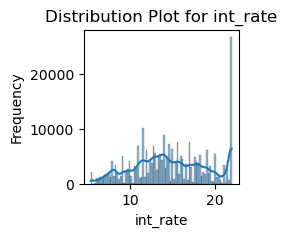

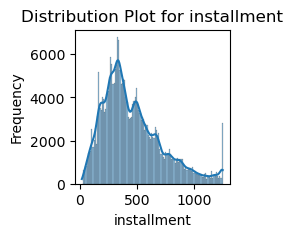

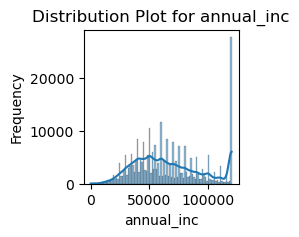

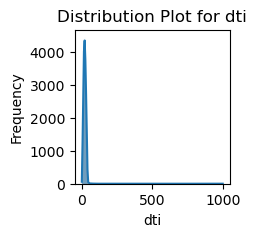

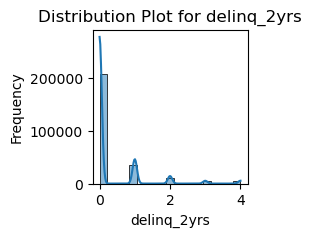

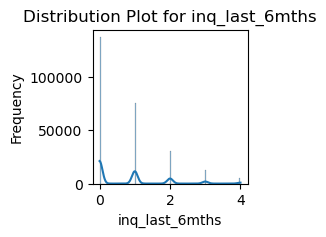

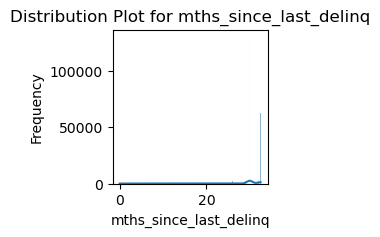

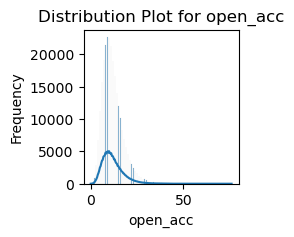

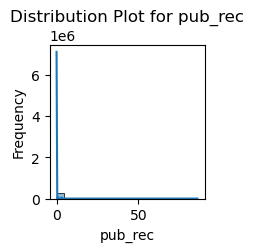

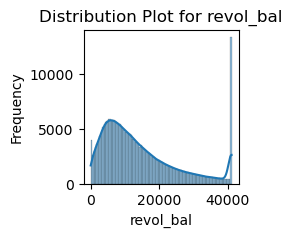

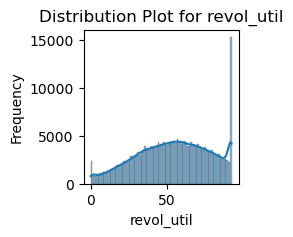

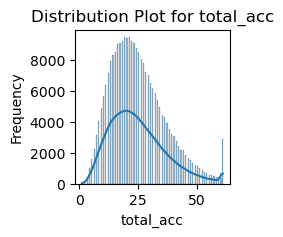

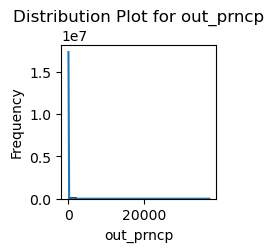

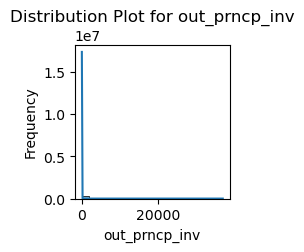

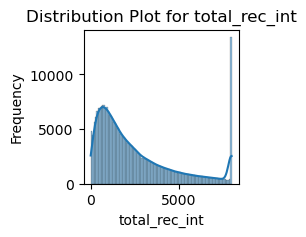

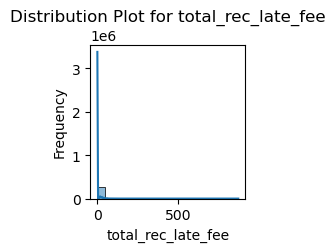

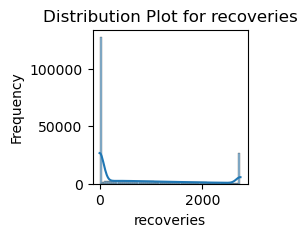

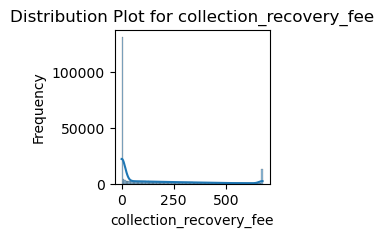

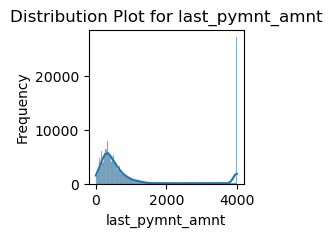

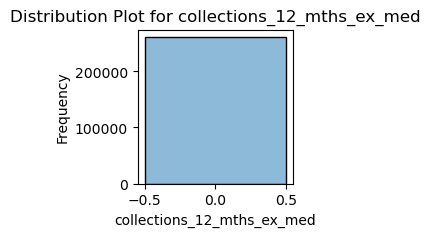

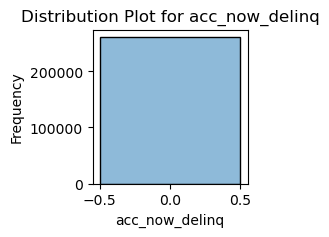

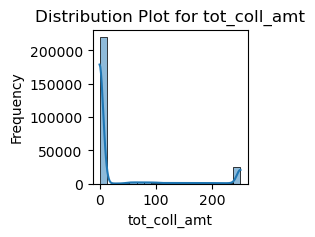

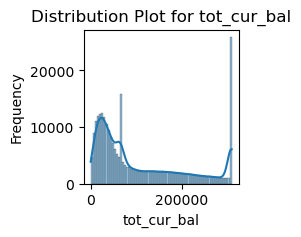

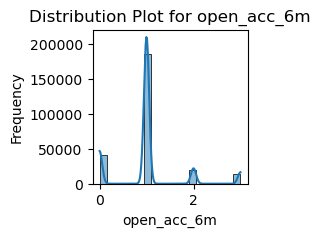

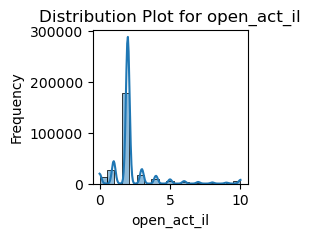

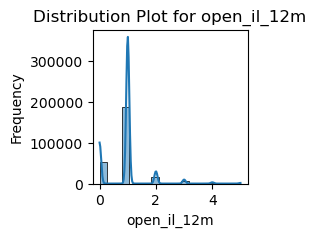

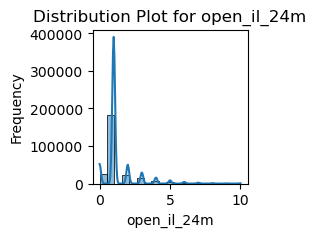

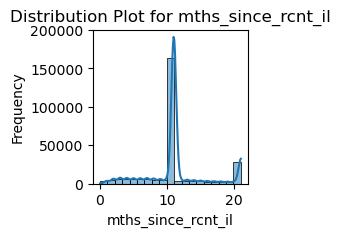

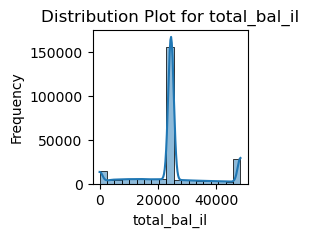

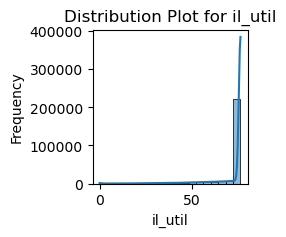

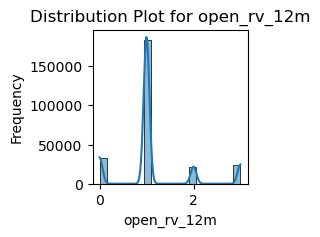

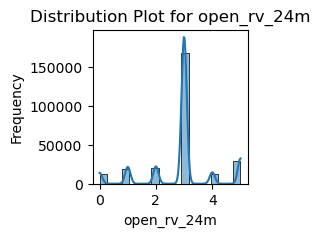

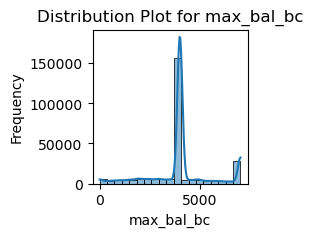

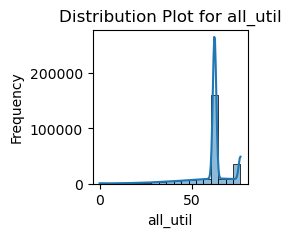

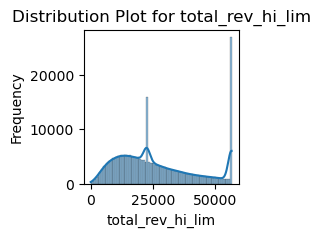

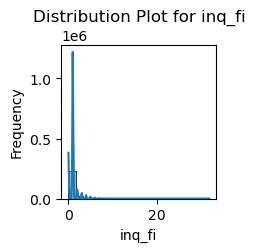

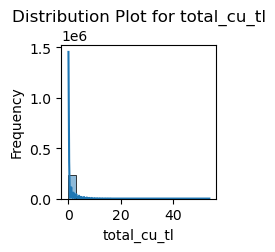

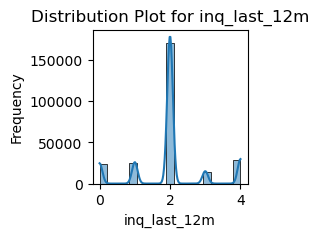

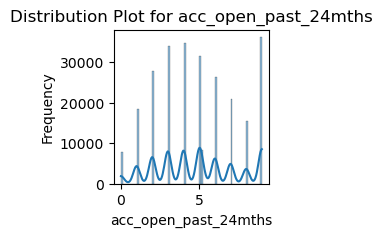

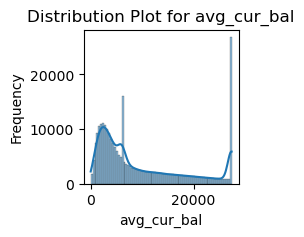

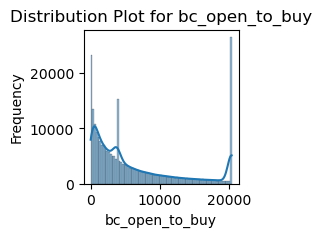

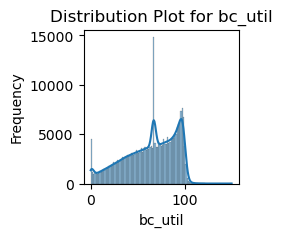

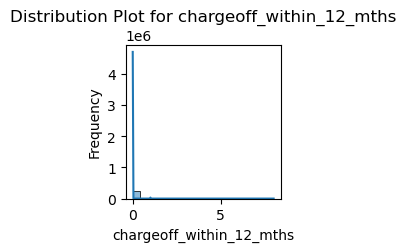

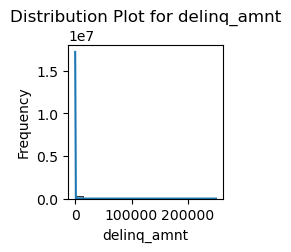

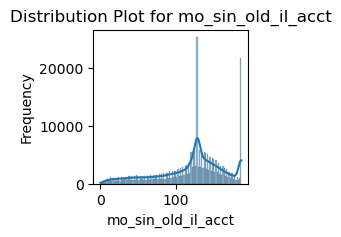

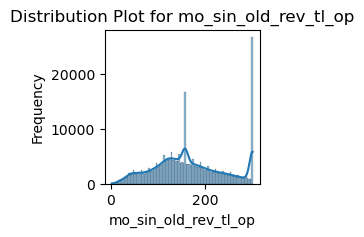

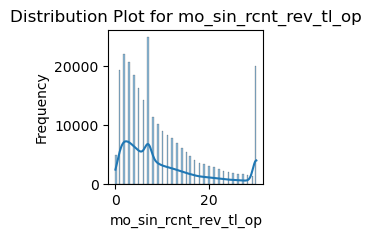

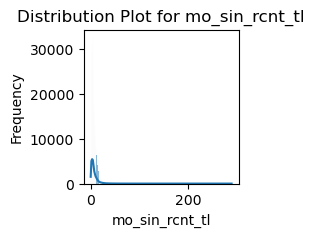

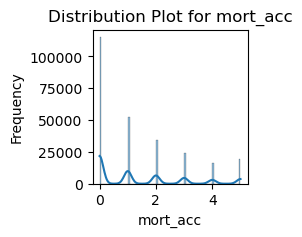

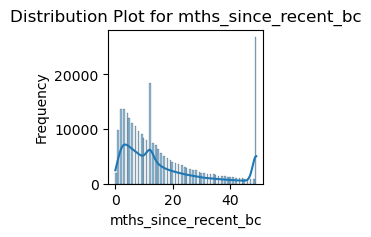

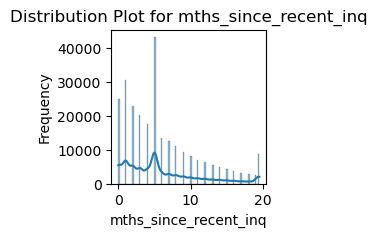

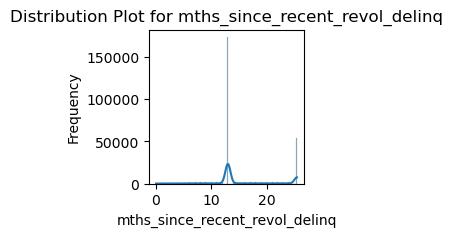

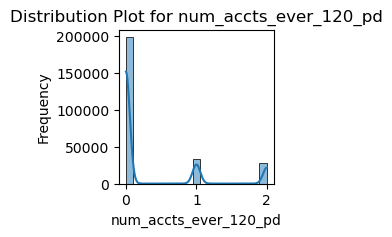

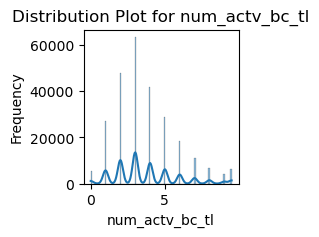

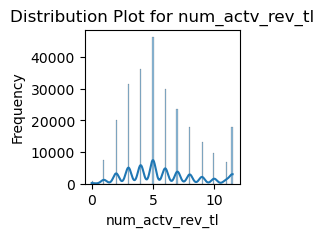

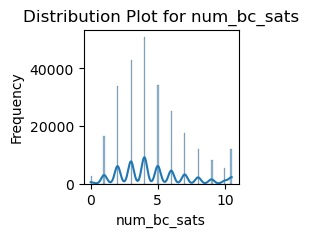

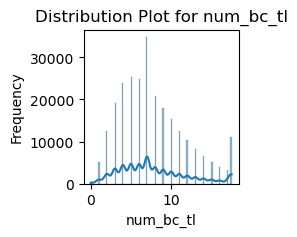

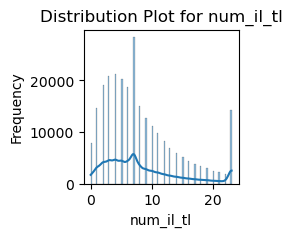

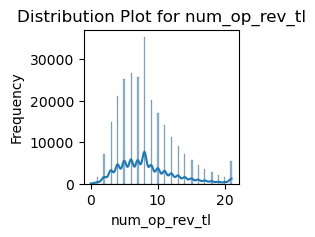

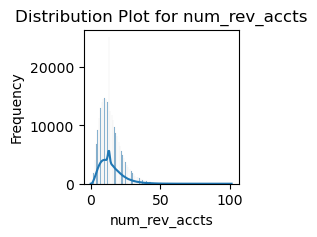

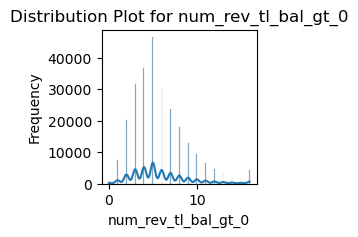

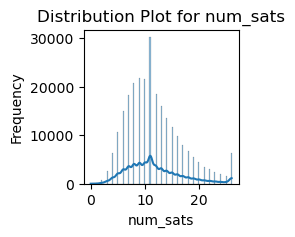

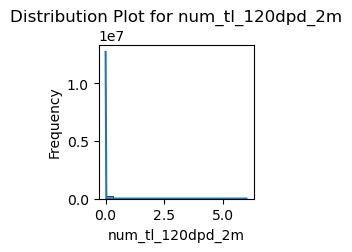

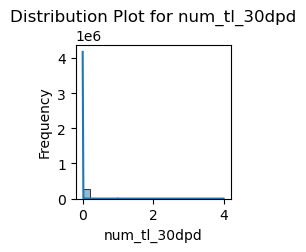

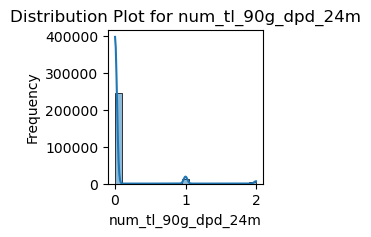

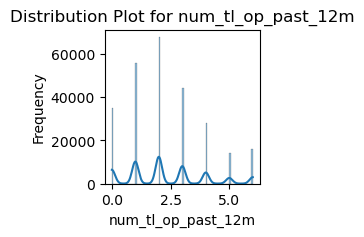

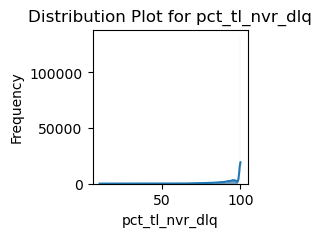

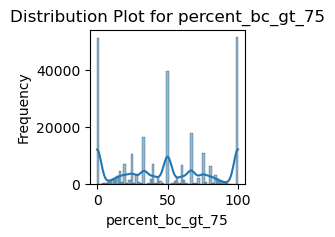

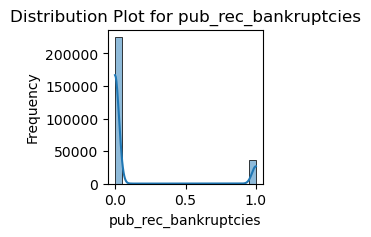

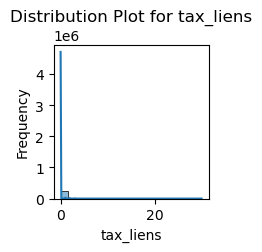

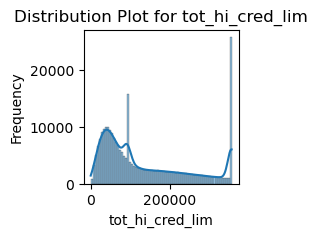

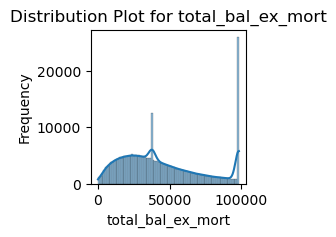

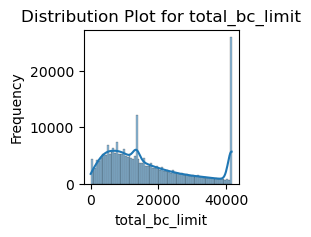

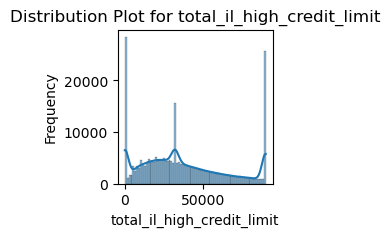

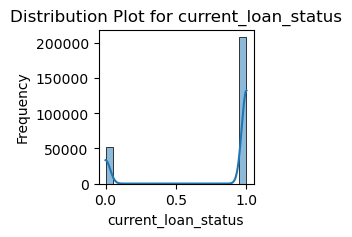

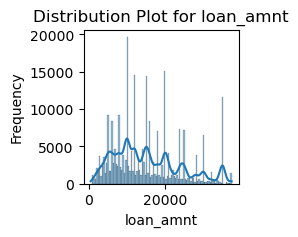

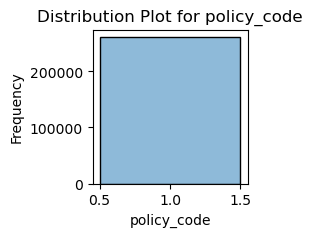

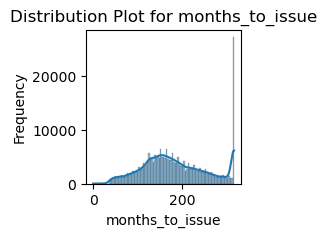

In [ ]:
numeric_columns= num_df.columns.to_list()
plot_distplots(num_df,numeric_columns)

In [ ]:
def plot_boxplots(df, columns):
    for column in columns:
        plt.figure(figsize=(2, 2))
        sns.boxplot(df[column])
        plt.title(f'Distribution Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

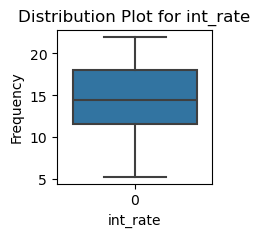

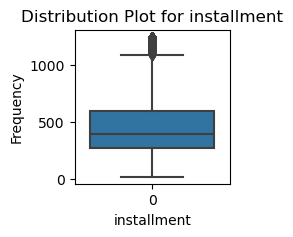

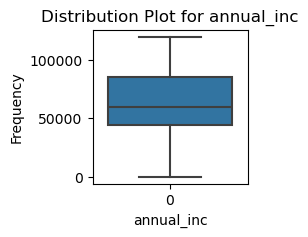

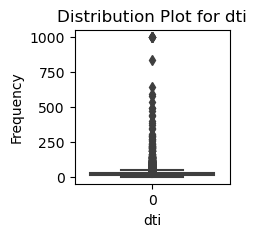

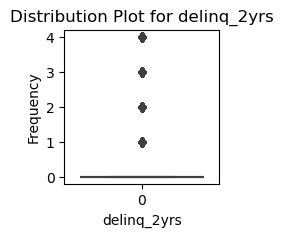

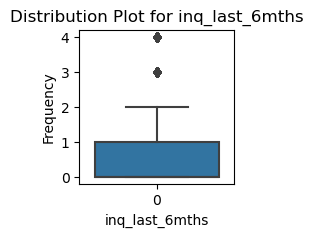

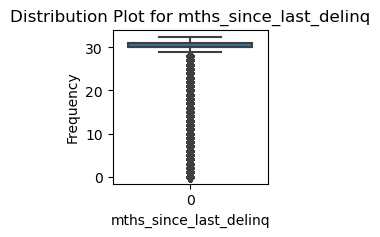

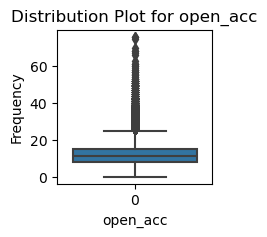

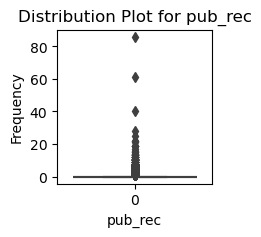

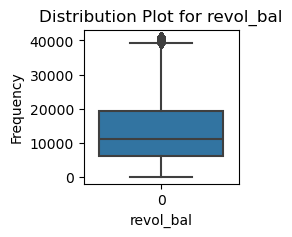

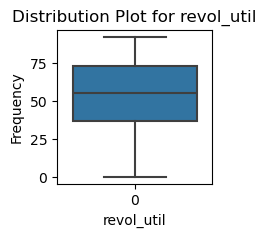

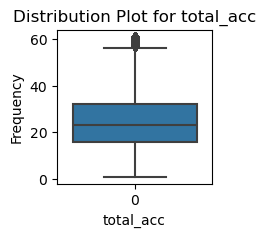

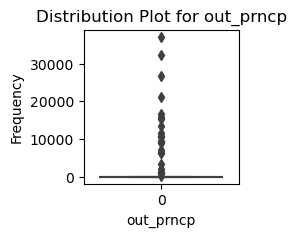

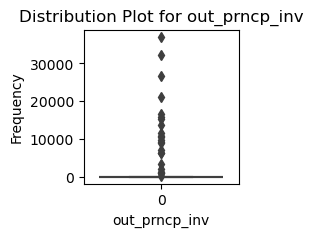

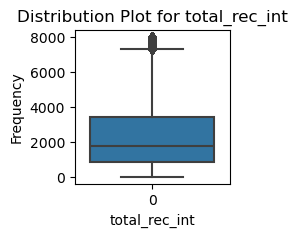

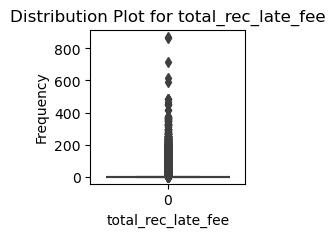

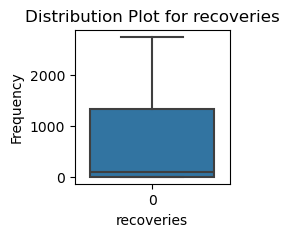

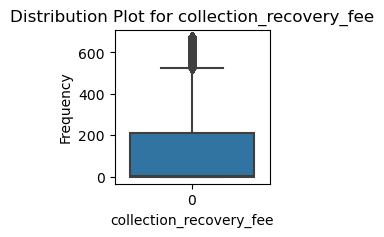

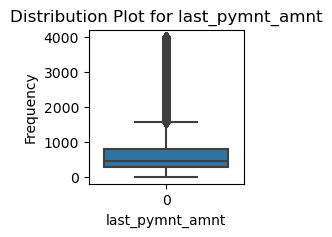

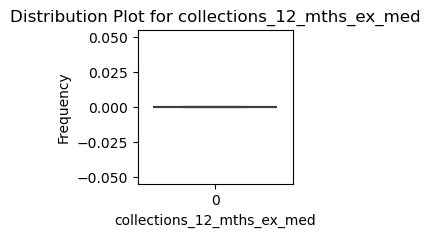

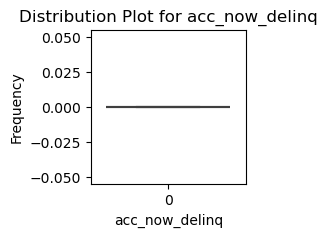

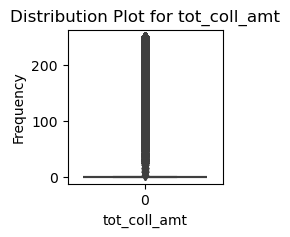

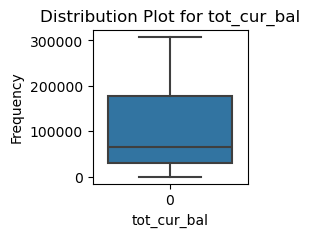

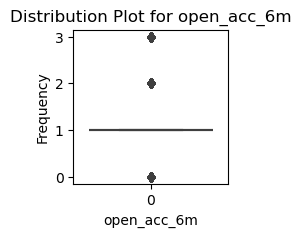

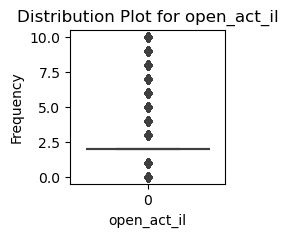

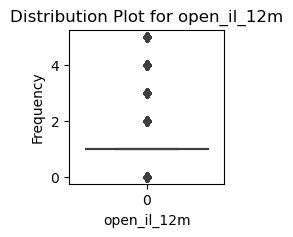

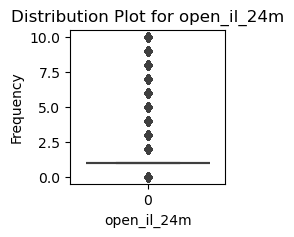

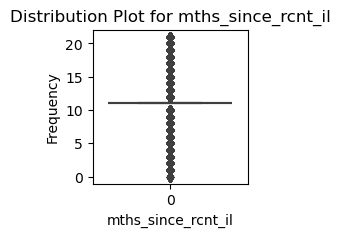

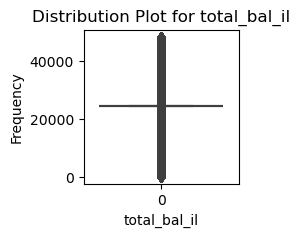

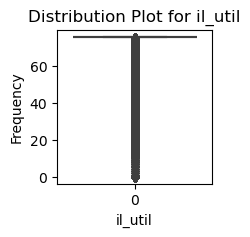

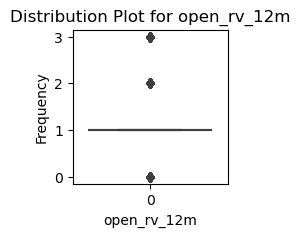

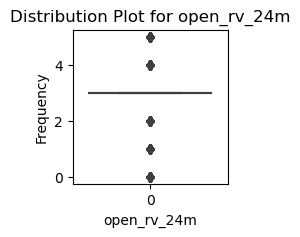

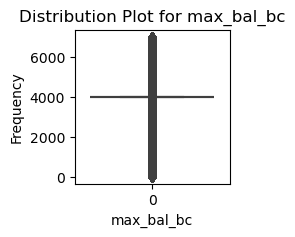

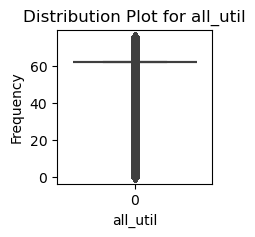

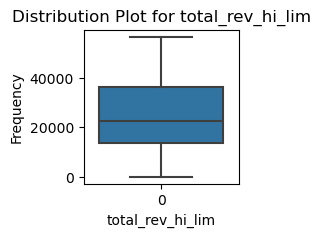

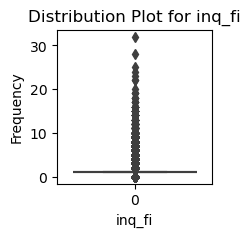

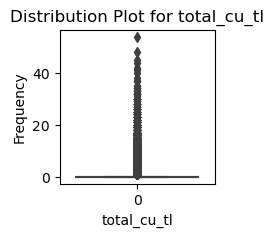

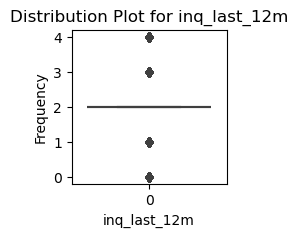

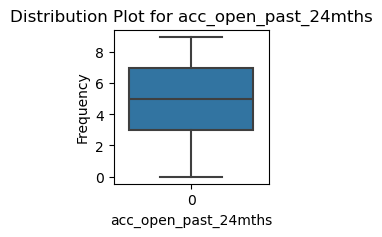

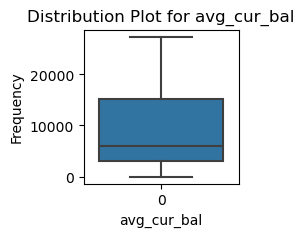

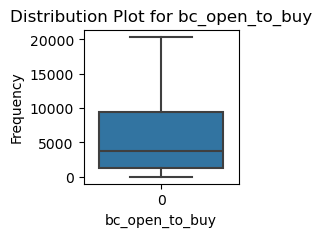

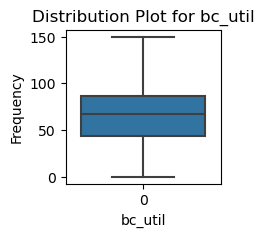

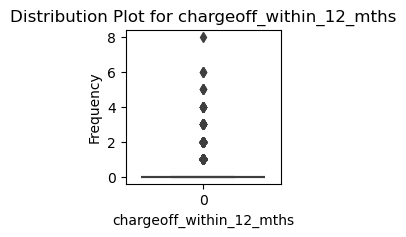

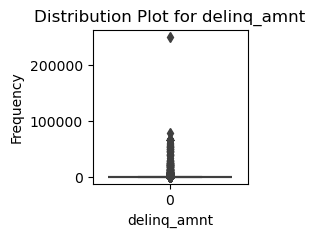

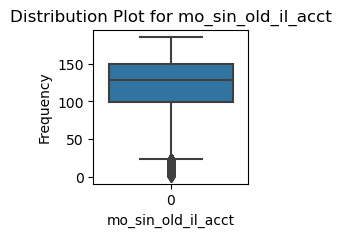

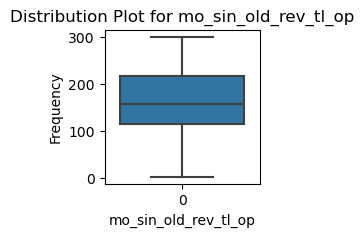

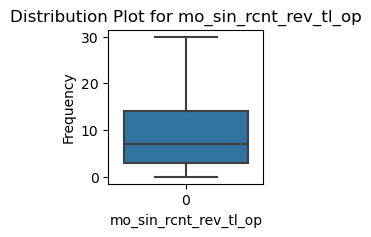

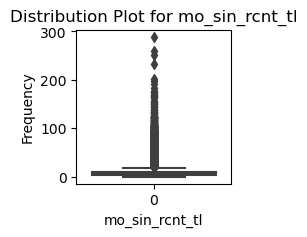

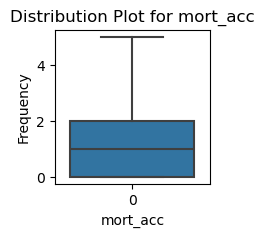

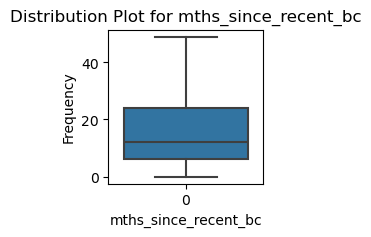

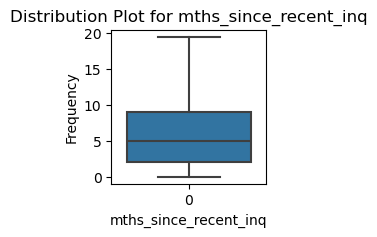

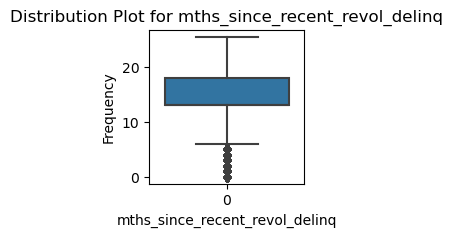

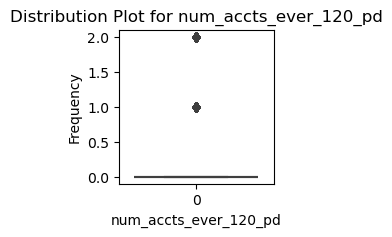

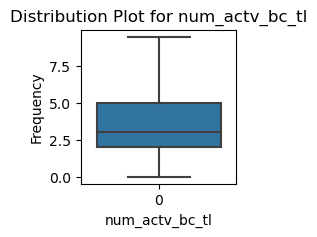

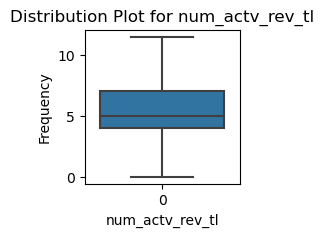

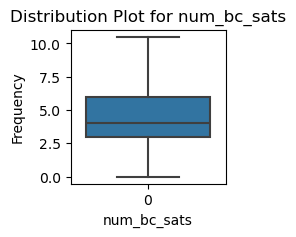

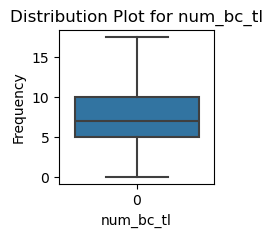

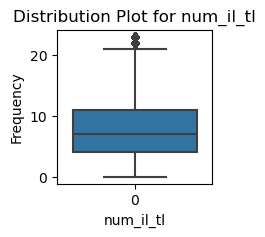

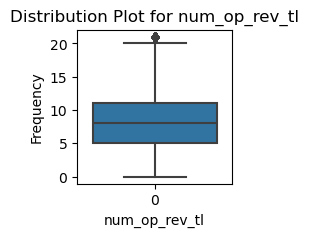

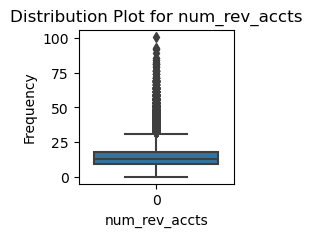

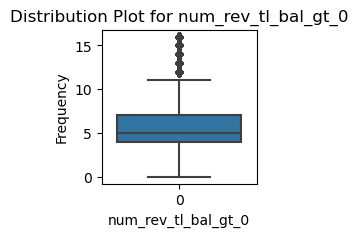

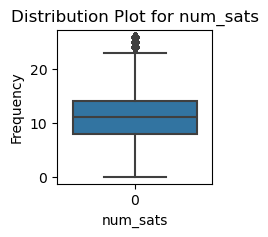

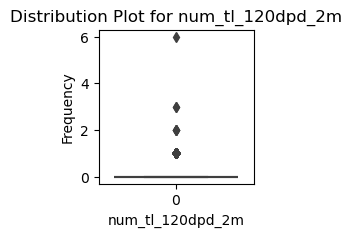

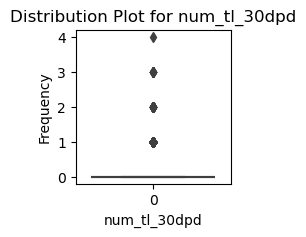

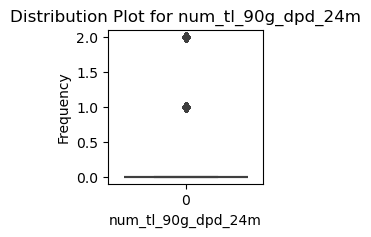

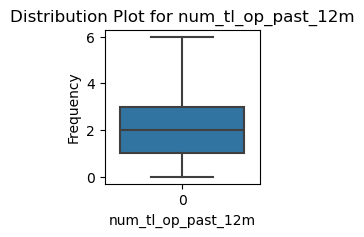

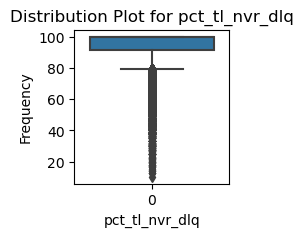

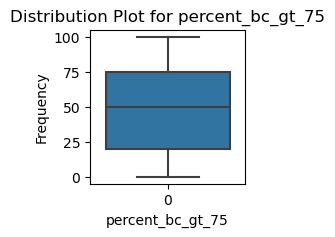

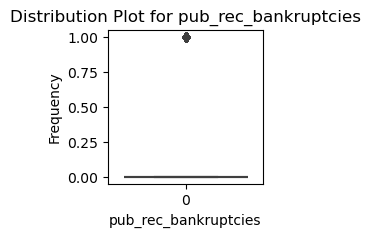

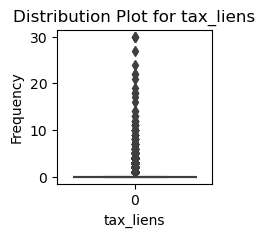

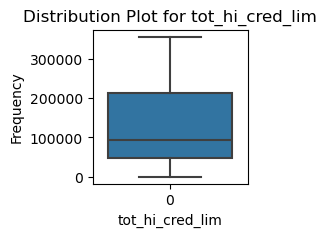

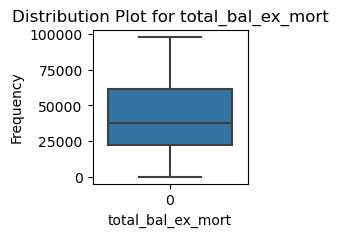

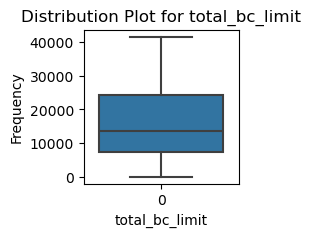

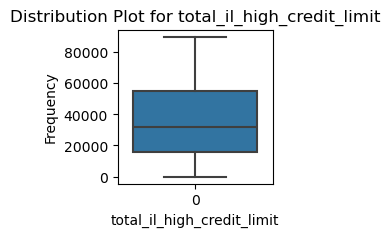

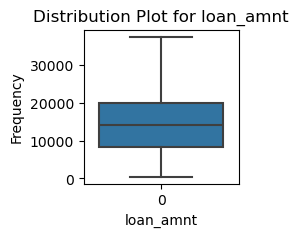

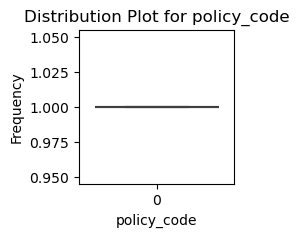

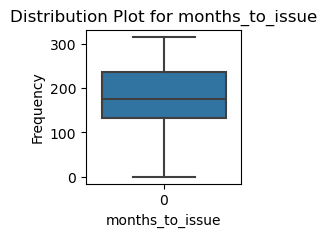

In [ ]:
numeric_columns= num_df.columns.to_list()
plot_boxplots(num_df,numeric_columns)

In [ ]:
undersampled_df7['current_loan_status']=undersampled_df7['current_loan_status'].astype(object)

In [ ]:
undersampled_df7['current_loan_status'].dtype

dtype('O')

In [ ]:
category_df.head()

,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag,region
0,36 months,A,between 5-9 years,RENT,Source Verified,n,others,f,Individual,N,Cash,N,Eastern
1,60 months,E,between 5-9 years,RENT,Source Verified,n,debt_consolidation,w,Individual,N,Cash,Y,Pacific
2,36 months,E,between 5-9 years,RENT,Verified,n,debt_consolidation,f,Individual,N,Cash,N,Central
3,60 months,D,10+ years,MORTGAGE,Source Verified,n,others,f,Individual,N,Cash,N,Pacific
4,36 months,A,less than 5 years,RENT,Source Verified,n,credit_card,w,Individual,N,Cash,N,Central


In [ ]:
category_df['current_loan_status'] = undersampled_df7.current_loan_status

In [ ]:
num_df.drop(columns = 'current_loan_status', axis=1, inplace=True)

In [ ]:
num_df['current_loan_status'] = undersampled_df7.current_loan_status

<Axes: xlabel='dti', ylabel='int_rate'>

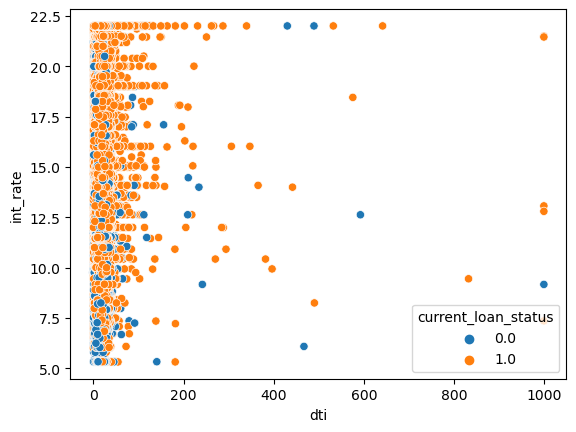

In [ ]:
sns.scatterplot(data=num_df, x='dti', y='int_rate', hue='current_loan_status')

In [ ]:
category_df.nunique()

term                    2
grade                   7
emp_length              3
home_ownership          4
verification_status     3
pymnt_plan              1
purpose                 3
initial_list_status     2
application_type        2
hardship_flag           2
disbursement_method     2
debt_settlement_flag    2
region                  6
current_loan_status     2
dtype: int64

In [ ]:
class_col=category_df.columns.to_list()

In [ ]:
class_col

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'initial_list_status',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag',
 'region',
 'current_loan_status']

In [ ]:
class_col.pop()

'current_loan_status'

In [ ]:
category_df_dummies = pd.get_dummies(data=category_df,columns=class_col)

In [ ]:
category_df_dummies.head()

,current_loan_status,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_10+ years,emp_length_between 5-9 years,emp_length_less than 5 years,home_ownership_MORTGAGE,home_ownership_OTHERS,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,purpose_credit_card,purpose_debt_consolidation,purpose_others,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,disbursement_method_Cash,disbursement_method_DirectPay,debt_settlement_flag_N,debt_settlement_flag_Y,region_Alaska,region_Central,region_Eastern,region_Hawaii-Aleutian,region_Mountain,region_Pacific
0,1.0,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False
1,1.0,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,True,False,True,False,False,True,True,False,True,False,True,False,False,True,False,False,False,False,False,True
2,1.0,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,False,False,False
3,1.0,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False,False,False,True
4,0.0,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,True,False,False,False,True,True,False,True,False,True,False,True,False,False,True,False,False,False,False


In [ ]:
category_df.dtypes

term                    object
grade                   object
emp_length              object
home_ownership          object
verification_status     object
pymnt_plan              object
purpose                 object
initial_list_status     object
application_type        object
hardship_flag           object
disbursement_method     object
debt_settlement_flag    object
region                  object
current_loan_status     object
dtype: object